# 0.0 Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
from IPython.display import Image
from IPython.core.display import HTML

import scipy
from scipy import stats
from scipy.stats import chi2

#Biblioteca pingouin
import pingouin as pg

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import jarque_bera
from statsmodels.formula.api import ols

/home/deivison/Documentos/projetos/venv_jupyter3/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## 0.1 Helper Functions

In [2]:
#ajusta graficos
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
#Retirar notação cientifica
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [3]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
#Retirar notação cientifica
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [5]:
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.rc('axes' ,labelsize=18)

# 11.5 Detecção da Heterocedasticidade

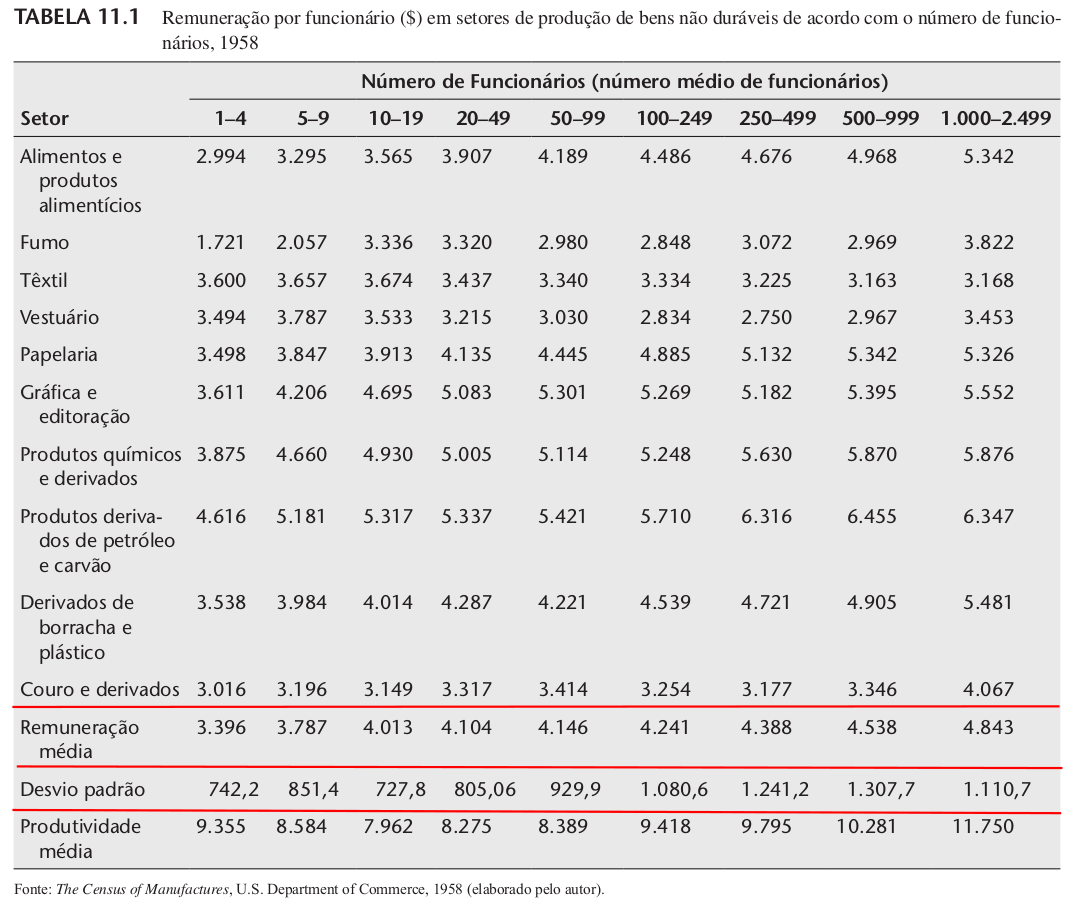

In [6]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/cap_11_tabela_11_1.png')

In [7]:
data = pd.read_excel('datasets/tabela_11.1_2.xlsx')

In [8]:
data

desvio_padrao  produtividade  remuneracao
0       742.2000      9355.0000         3396
1       851.4000      8584.0000         3787
2       727.8000      7962.0000         4013
3       805.0600      8275.0000         4104
4       929.9000      8389.0000         4146
5      1080.6000      9418.0000         4241
6      1241.2000      9795.0000         4388
7      1307.7000     10281.0000         4538
8      1110.7000     11750.0000         4843

In [9]:
data.columns

Index(['desvio_padrao', 'produtividade', 'remuneracao'], dtype='object')

In [10]:
x = data[['remuneracao']]
y = data['desvio_padrao']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
summary = model.summary()
data['predictions'] = model.predict(x)
print(summary)

                            OLS Regression Results                            
Dep. Variable:          desvio_padrao   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     10.10
Date:                Sat, 10 Jun 2023   Prob (F-statistic):             0.0155
Time:                        20:33:20   Log-Likelihood:                -56.591
No. Observations:                   9   AIC:                             117.2
Df Residuals:                       7   BIC:                             117.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -663.3230    518.683     -1.279      

/home/deivison/Documentos/projetos/venv_jupyter3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [11]:
data

desvio_padrao  produtividade  remuneracao  predictions
0       742.2000      9355.0000         3396     675.4991
1       851.4000      8584.0000         3787     829.6450
2       727.8000      7962.0000         4013     918.7421
3       805.0600      8275.0000         4104     954.6175
4       929.9000      8389.0000         4146     971.1754
5      1080.6000      9418.0000         4241    1008.6277
6      1241.2000      9795.0000         4388    1066.5803
7      1307.7000     10281.0000         4538    1125.7155
8      1110.7000     11750.0000         4843    1245.9572

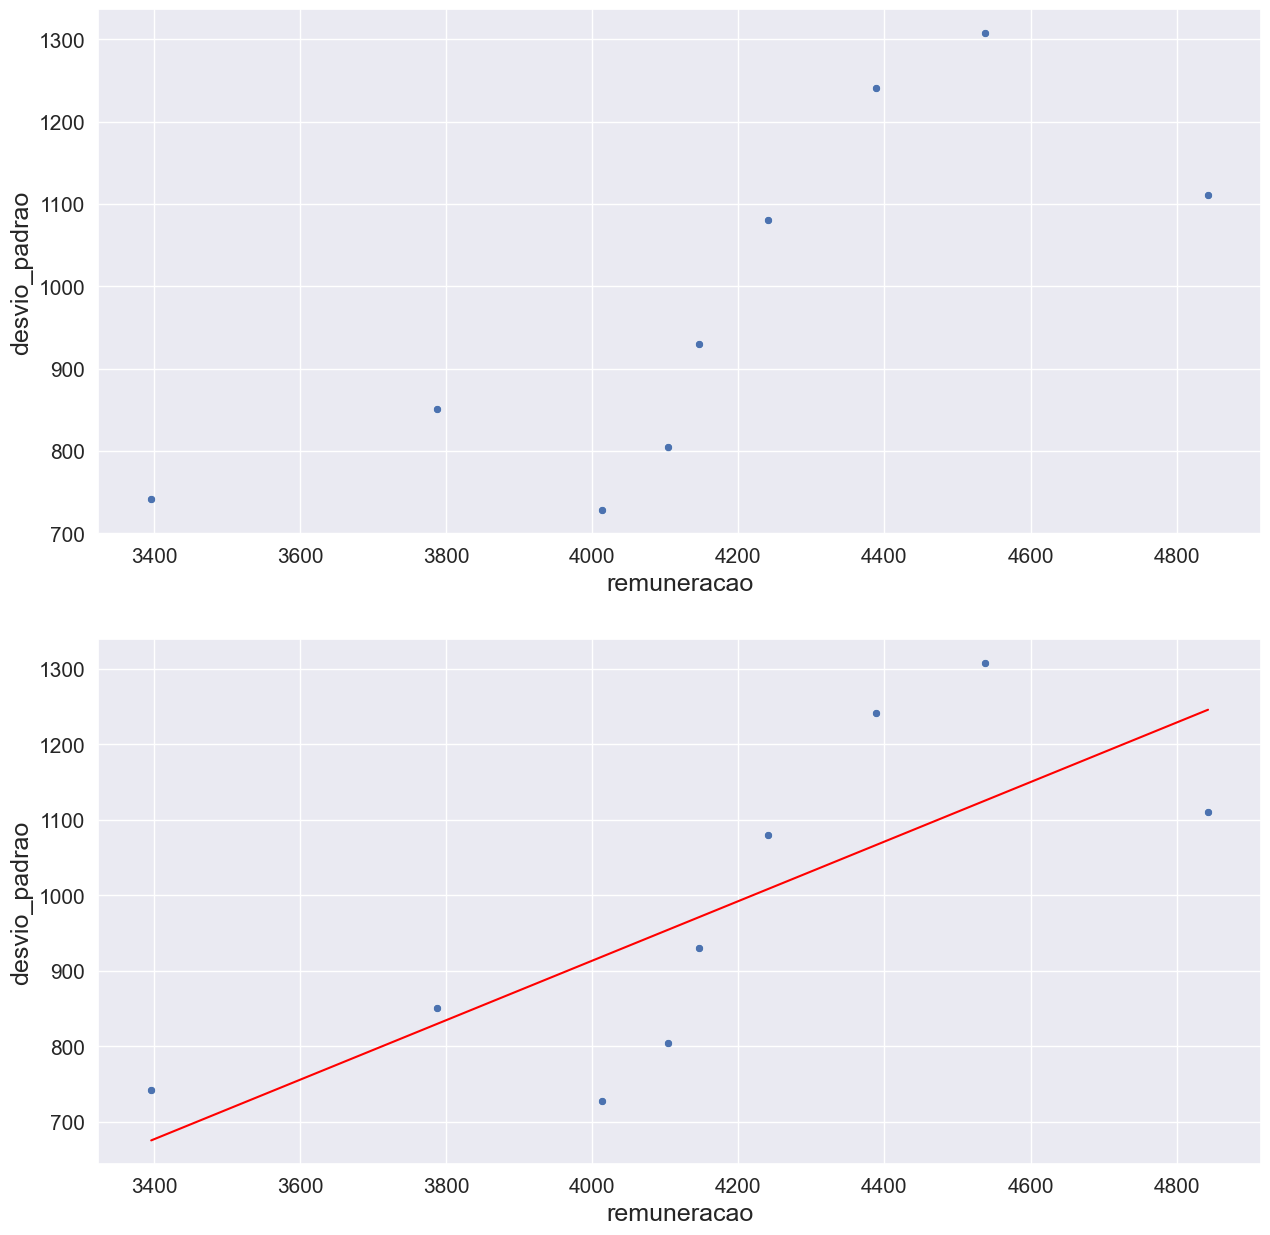

In [12]:
fig = plt.figure(figsize=(15,15))
specs = gridspec.GridSpec(nrows = 2, ncols = 1, figure = fig)

ax1 = fig.add_subplot(specs[0,0])
ax2 = fig.add_subplot(specs[1,0])


sns.scatterplot( data = data, x= 'remuneracao',y='desvio_padrao', ax = ax1);

sns.scatterplot( data = data, x= 'remuneracao',y='desvio_padrao', ax = ax2);
sns.lineplot( data = data, x= 'remuneracao', y ='predictions',color='red', ax = ax2);

## Método gráfico

In [13]:
data['residuos'] = model.resid
data

desvio_padrao  produtividade  remuneracao  predictions  residuos
0       742.2000      9355.0000         3396     675.4991   66.7009
1       851.4000      8584.0000         3787     829.6450   21.7550
2       727.8000      7962.0000         4013     918.7421 -190.9421
3       805.0600      8275.0000         4104     954.6175 -149.5575
4       929.9000      8389.0000         4146     971.1754  -41.2754
5      1080.6000      9418.0000         4241    1008.6277   71.9723
6      1241.2000      9795.0000         4388    1066.5803  174.6197
7      1307.7000     10281.0000         4538    1125.7155  181.9845
8      1110.7000     11750.0000         4843    1245.9572 -135.2572

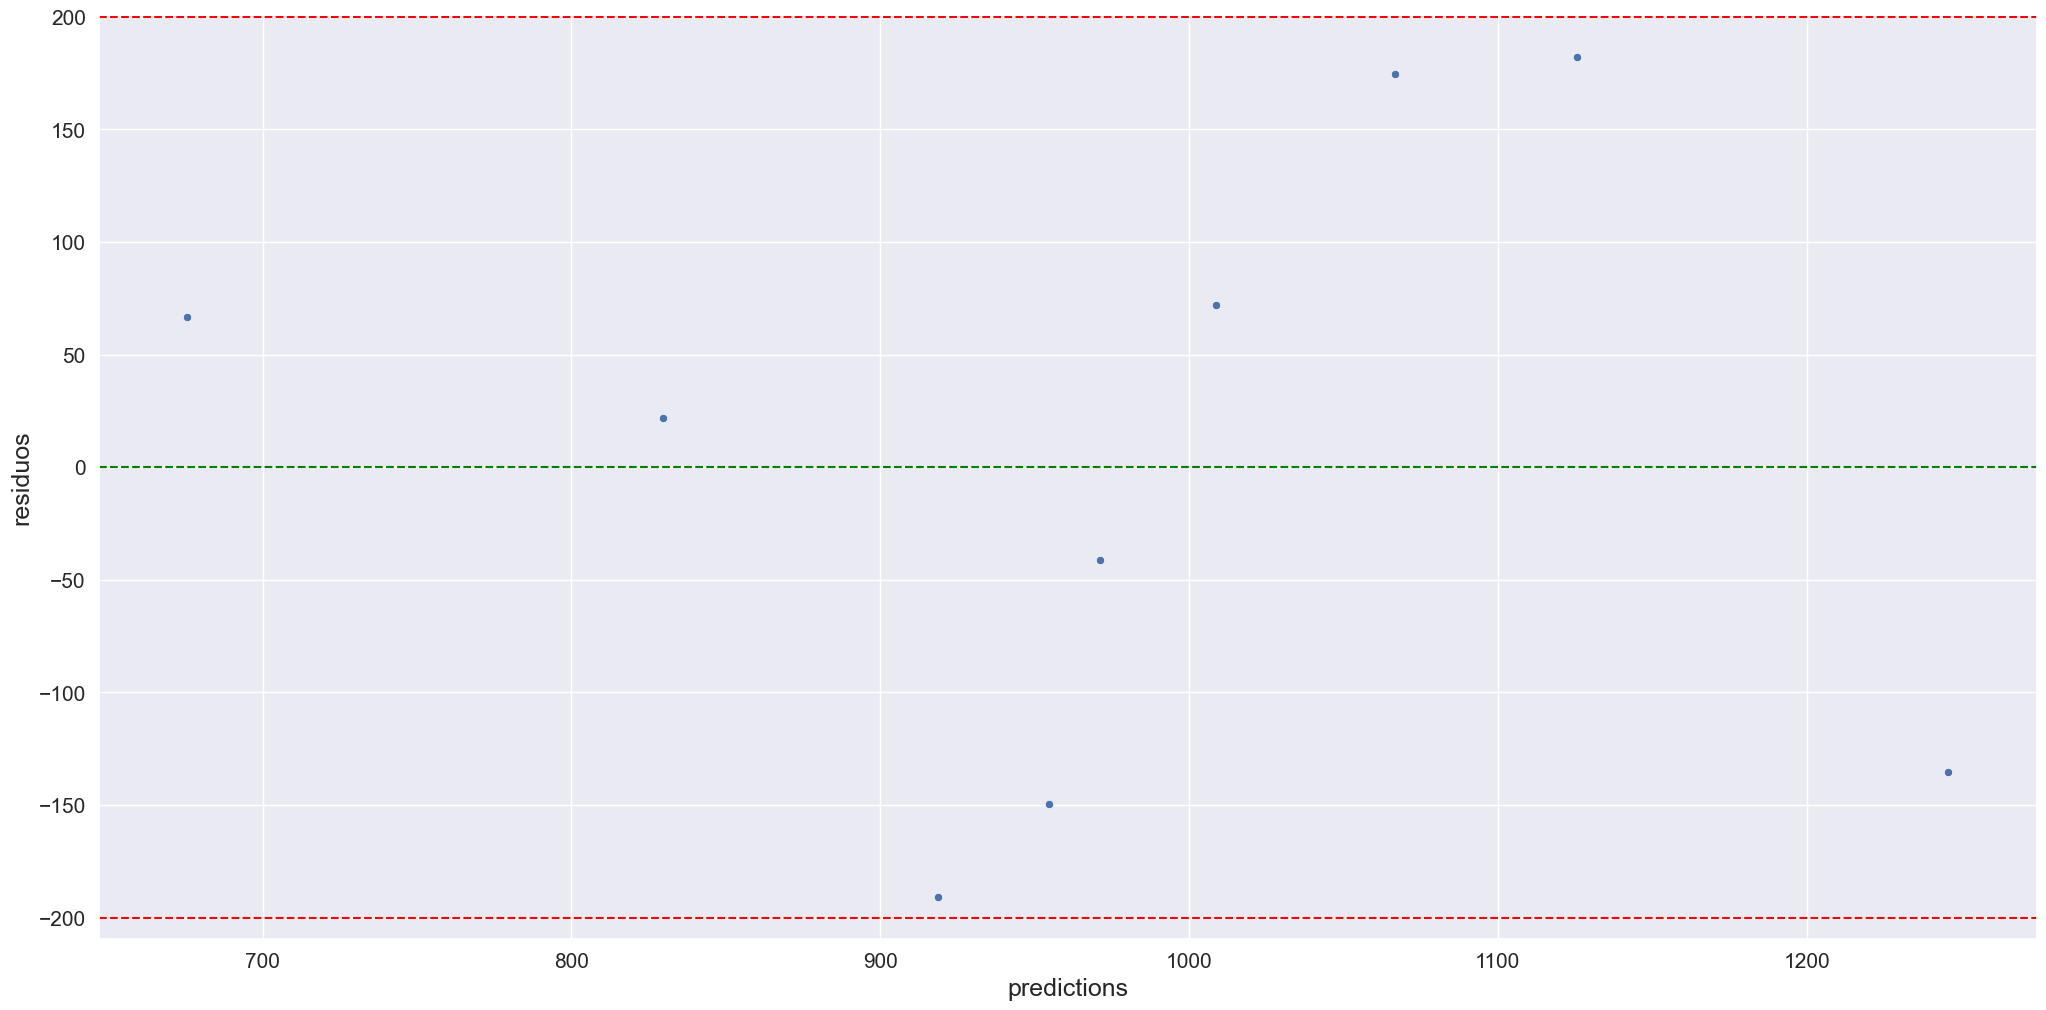

In [14]:
sns.scatterplot(data = data, x = 'predictions',y='residuos');
plt.axhline(y = 0, color ="green", linestyle ="--");
plt.axhline(y = 200, color ="red", linestyle ="--");
plt.axhline(y = -200, color ="red", linestyle ="--");

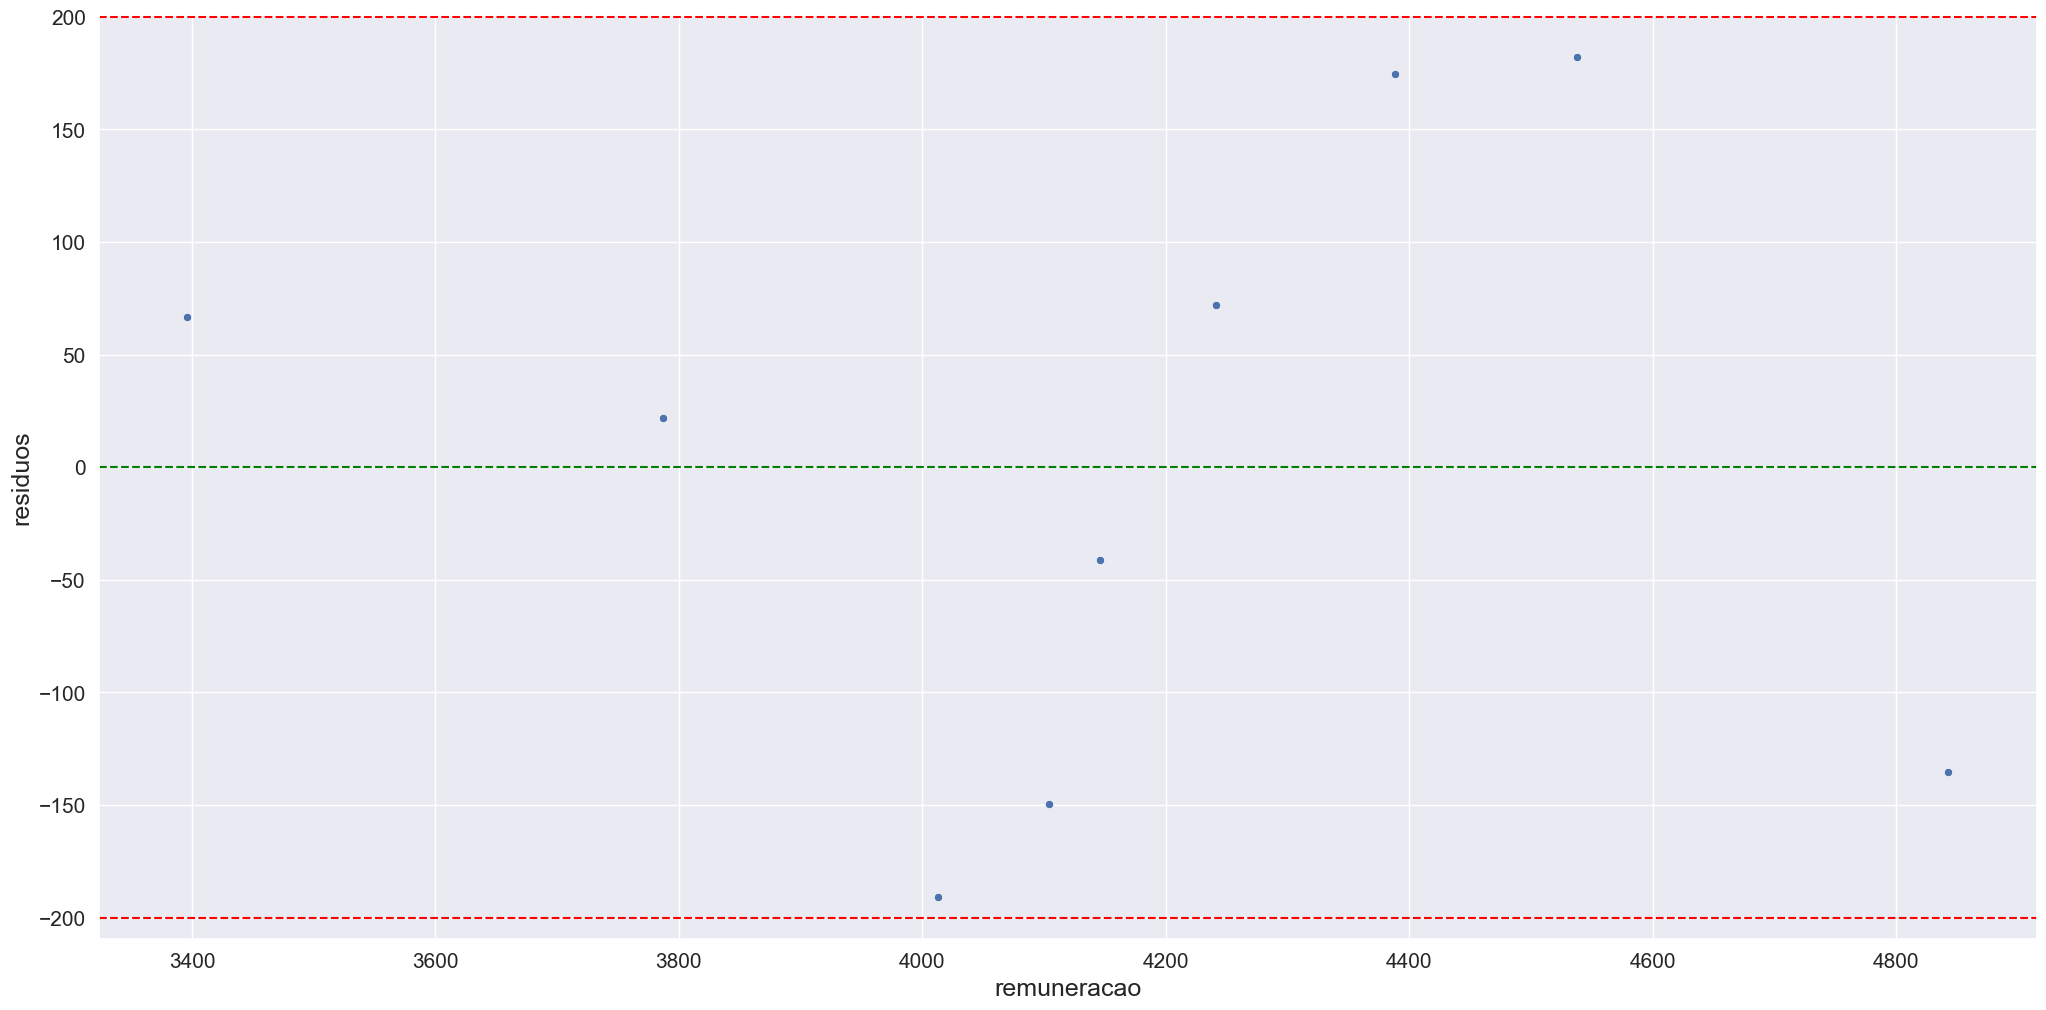

In [15]:
sns.scatterplot(data = data, x = 'remuneracao',y='residuos');
plt.axhline(y = 0, color ="green", linestyle ="--");
plt.axhline(y = 200, color ="red", linestyle ="--");
plt.axhline(y = -200, color ="red", linestyle ="--");

## Exemplo 11.1 Teste de Park

In [16]:
data = pd.read_excel('datasets/tabela_11.1_2.xlsx')
data

desvio_padrao  produtividade  remuneracao
0       742.2000      9355.0000         3396
1       851.4000      8584.0000         3787
2       727.8000      7962.0000         4013
3       805.0600      8275.0000         4104
4       929.9000      8389.0000         4146
5      1080.6000      9418.0000         4241
6      1241.2000      9795.0000         4388
7      1307.7000     10281.0000         4538
8      1110.7000     11750.0000         4843

In [17]:
x = data[['produtividade']]
y = data['remuneracao']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:            remuneracao   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     5.445
Date:                Sat, 10 Jun 2023   Prob (F-statistic):             0.0523
Time:                        20:33:22   Log-Likelihood:                -64.028
No. Observations:                   9   AIC:                             132.1
Df Residuals:                       7   BIC:                             132.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1992.0621    936.612      2.127

/home/deivison/Documentos/projetos/venv_jupyter3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


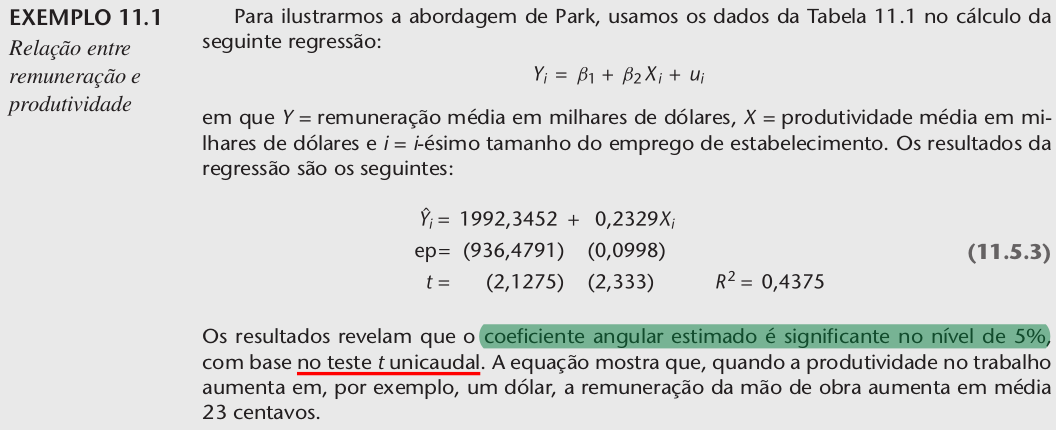

In [18]:
Image('./imagens/cap_11_exemplo_11.1_1.png')

### Método -  Teste de Park - Cálculo regressão dos resíduos contra $X_{i}$

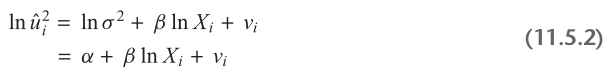

In [19]:
Image('./imagens/cap_11_exemplo_11.1_2.png')

In [20]:
data['residuo']   = model.resid
data['residuo_2'] = np.power(data['residuo'],2)
data

desvio_padrao  produtividade  remuneracao   residuo   residuo_2
0       742.2000      9355.0000         3396 -775.7709 601820.4273
1       851.4000      8584.0000         3787 -205.1284  42077.6515
2       727.8000      7962.0000         4013  165.7972  27488.7129
3       805.0600      8275.0000         4104  183.8684  33807.5938
4       929.9000      8389.0000         4146  199.3065  39723.0773
5      1080.6000      9418.0000         4241   54.5502   2975.7224
6      1241.2000      9795.0000         4388  113.7094  12929.8357
7      1307.7000     10281.0000         4538  150.4718  22641.7512
8      1110.7000     11750.0000         4843  113.1957  12813.2776

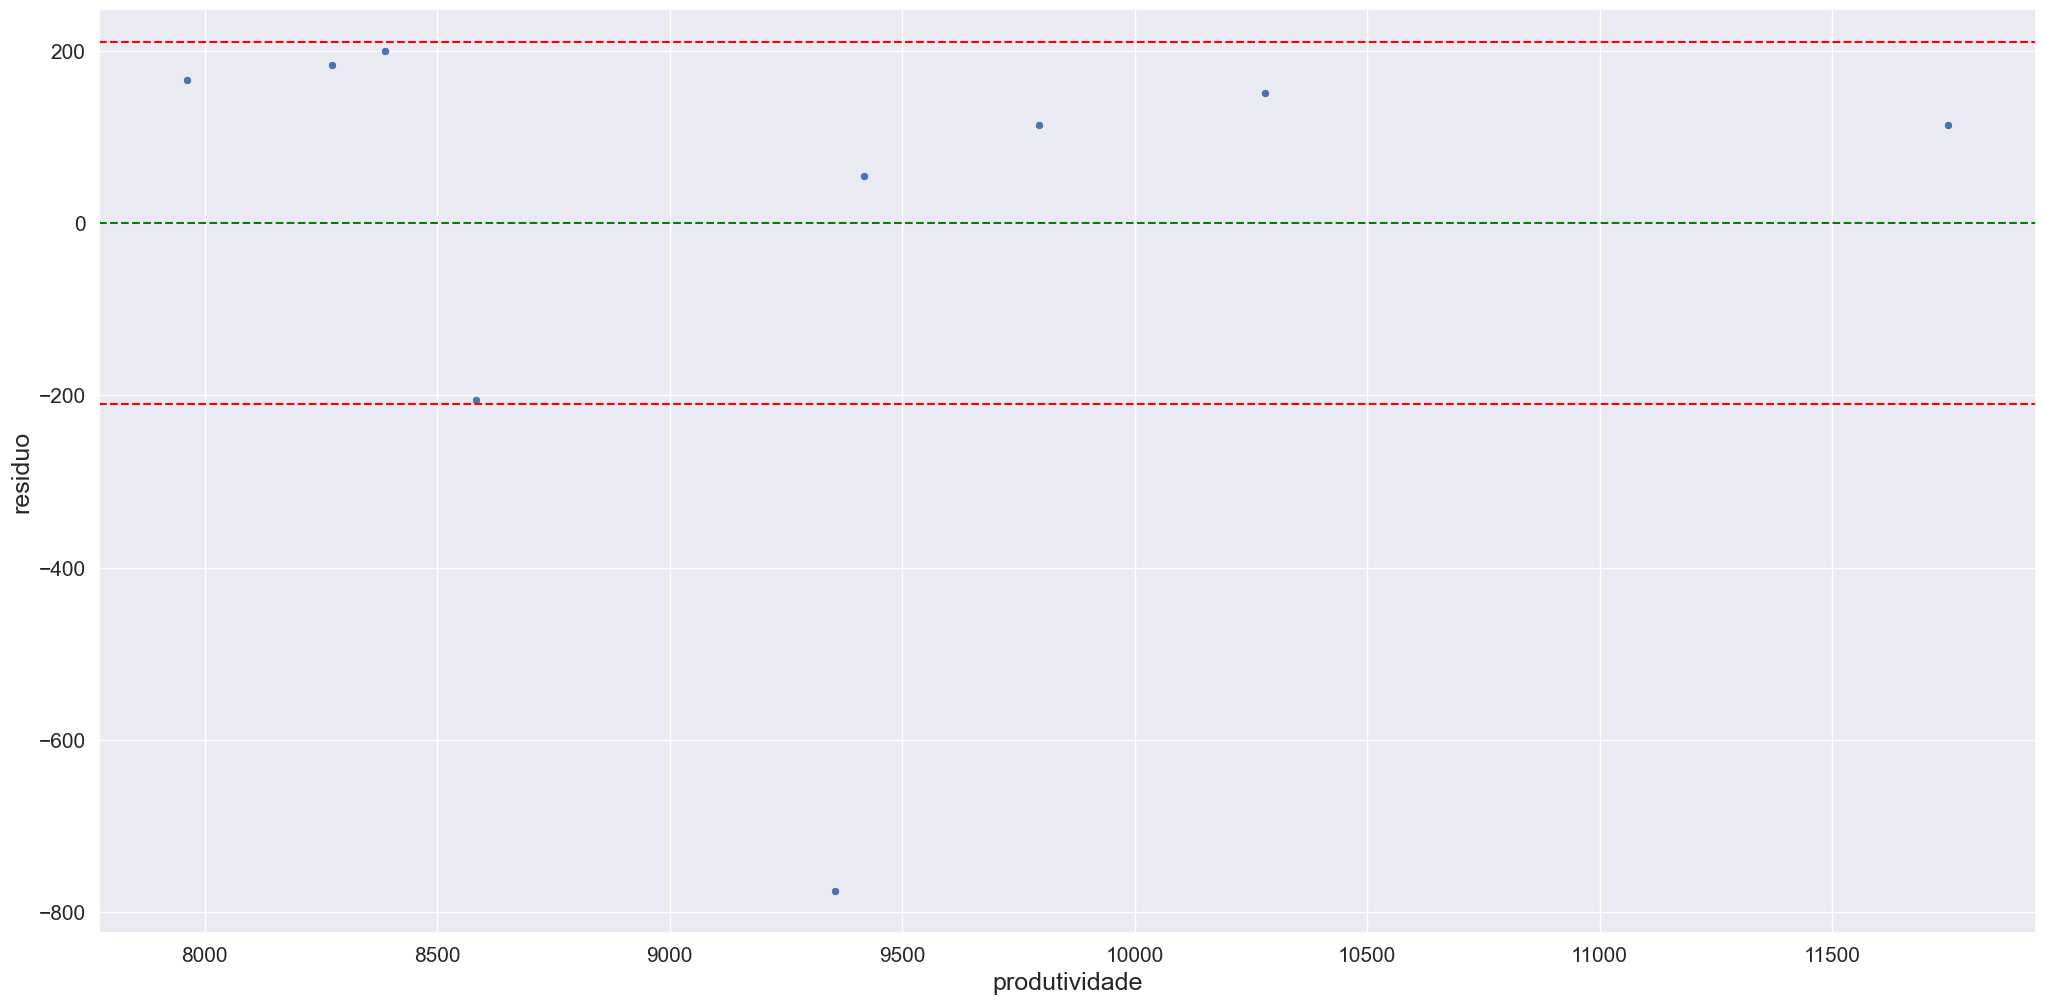

In [21]:
sns.scatterplot(data = data, x = 'produtividade',y='residuo');
plt.axhline(y = 0, color ="green", linestyle ="--");
plt.axhline(y = 210, color ="red", linestyle ="--");
plt.axhline(y = -210, color ="red", linestyle ="--");

### Transformando para modelo log-log

In [22]:
data['residuo_2_ln']     = np.log(data['residuo_2'])
data['produtividade_ln'] = np.log(data['produtividade'])
data

desvio_padrao  produtividade  remuneracao   residuo   residuo_2  residuo_2_ln  produtividade_ln
0       742.2000      9355.0000         3396 -775.7709 601820.4273       13.3077            9.1437
1       851.4000      8584.0000         3787 -205.1284  42077.6515       10.6473            9.0577
2       727.8000      7962.0000         4013  165.7972  27488.7129       10.2215            8.9824
3       805.0600      8275.0000         4104  183.8684  33807.5938       10.4284            9.0210
4       929.9000      8389.0000         4146  199.3065  39723.0773       10.5897            9.0347
5      1080.6000      9418.0000         4241   54.5502   2975.7224        7.9982            9.1504
6      1241.2000      9795.0000         4388  113.7094  12929.8357        9.4673            9.1896
7      1307.7000     10281.0000         4538  150.4718  22641.7512       10.0276            9.2381
8      1110.7000     11750.0000         4843  113.1957  12813.2776        9.4582            9.3716

In [23]:
x = data[['produtividade_ln']]
y = data['residuo_2_ln']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:           residuo_2_ln   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                 -0.074
Method:                 Least Squares   F-statistic:                    0.4459
Date:                Sat, 10 Jun 2023   Prob (F-statistic):              0.526
Time:                        20:33:23   Log-Likelihood:                -15.086
No. Observations:                   9   AIC:                             34.17
Df Residuals:                       7   BIC:                             34.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               35.8268     38.323  

/home/deivison/Documentos/projetos/venv_jupyter3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


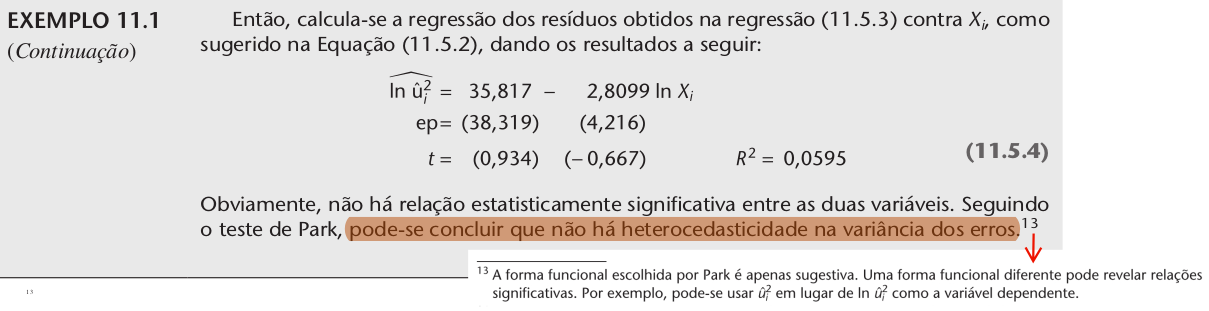

In [24]:
Image('./imagens/cap_11_exemplo_11.1_3.png')

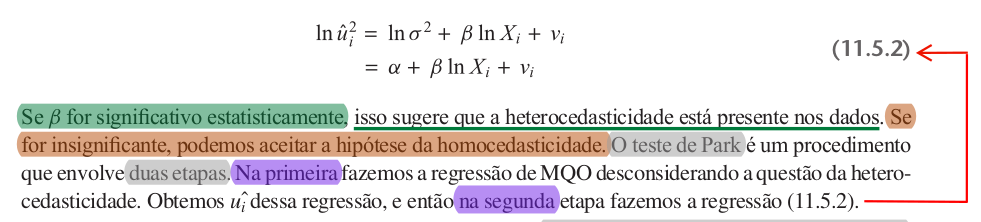

In [25]:
Image('./imagens/cap_11_exemplo_11.1_4.png')

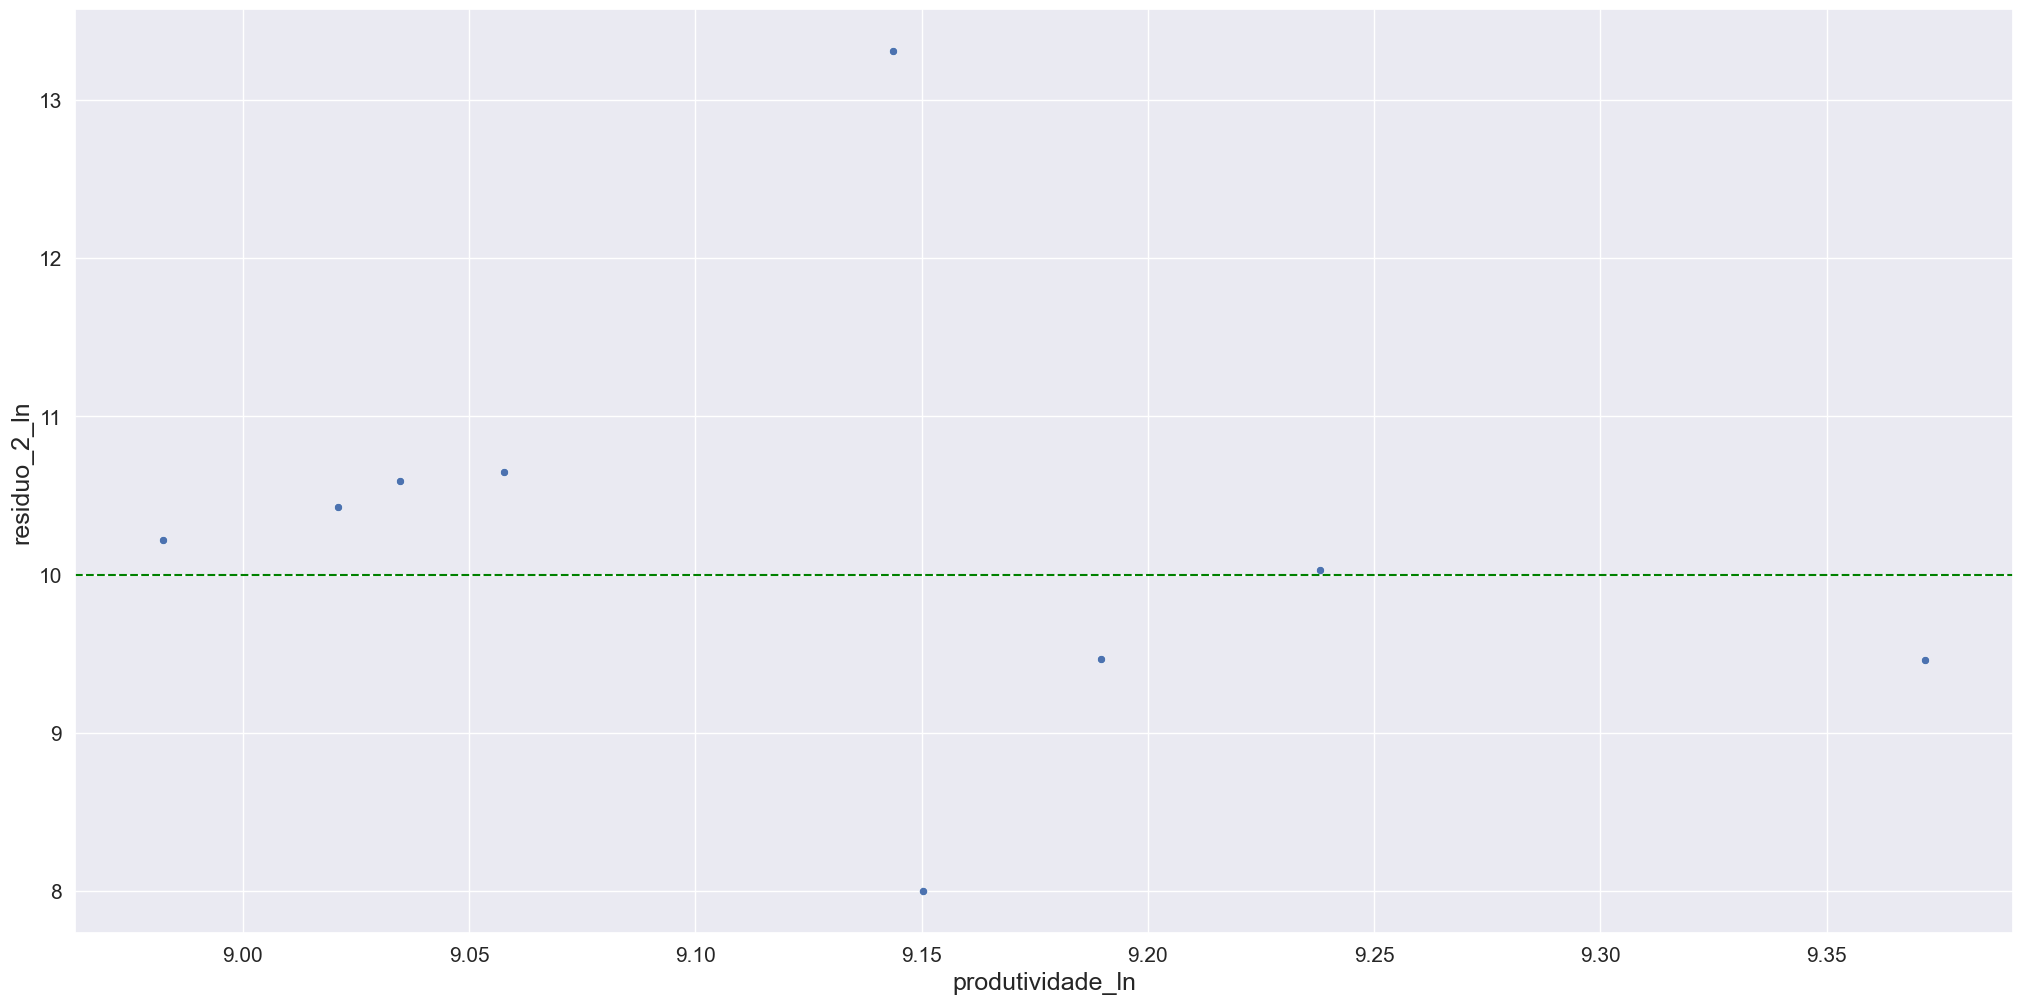

In [26]:
sns.scatterplot(data = data, x = 'produtividade_ln',y='residuo_2_ln');
plt.axhline(y = 10, color ="green", linestyle ="--");

### Gráfico dos resíduos do modelo Log - Log - Influência do erro $V_{i}$ modelo transformado

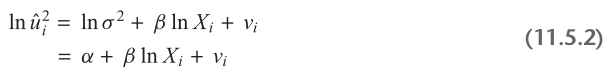

In [27]:
Image('./imagens/cap_11_exemplo_11.1_2.png')

In [28]:
data['residuo_2_ln_predict'] = model.predict(x)
data['residuo_2_ln_residuo'] = model.resid
data

desvio_padrao  produtividade  remuneracao   residuo   residuo_2  residuo_2_ln  produtividade_ln  residuo_2_ln_predict  residuo_2_ln_residuo
0       742.2000      9355.0000         3396 -775.7709 601820.4273       13.3077            9.1437               10.2061                3.1016
1       851.4000      8584.0000         3787 -205.1284  42077.6515       10.6473            9.0577               10.4471                0.2002
2       727.8000      7962.0000         4013  165.7972  27488.7129       10.2215            8.9824               10.6579               -0.4363
3       805.0600      8275.0000         4104  183.8684  33807.5938       10.4284            9.0210               10.5498               -0.1214
4       929.9000      8389.0000         4146  199.3065  39723.0773       10.5897            9.0347               10.5115                0.0782
5      1080.6000      9418.0000         4241   54.5502   2975.7224        7.9982            9.1504               10.1873               -2.1890
6      1241.2000      9795.0000         4388  113.7094  12929.8357        9.4673            9.1896               10.0773               -0.6100
7      1307.7000     10281.0000         4538  150.4718  22641.7512       10.0276            9.2381                9.9416                0.0859
8      1110.7000     11750.0000         4843  113.1957  12813.2776        9.4582            9.3716                9.5674               -0.1092

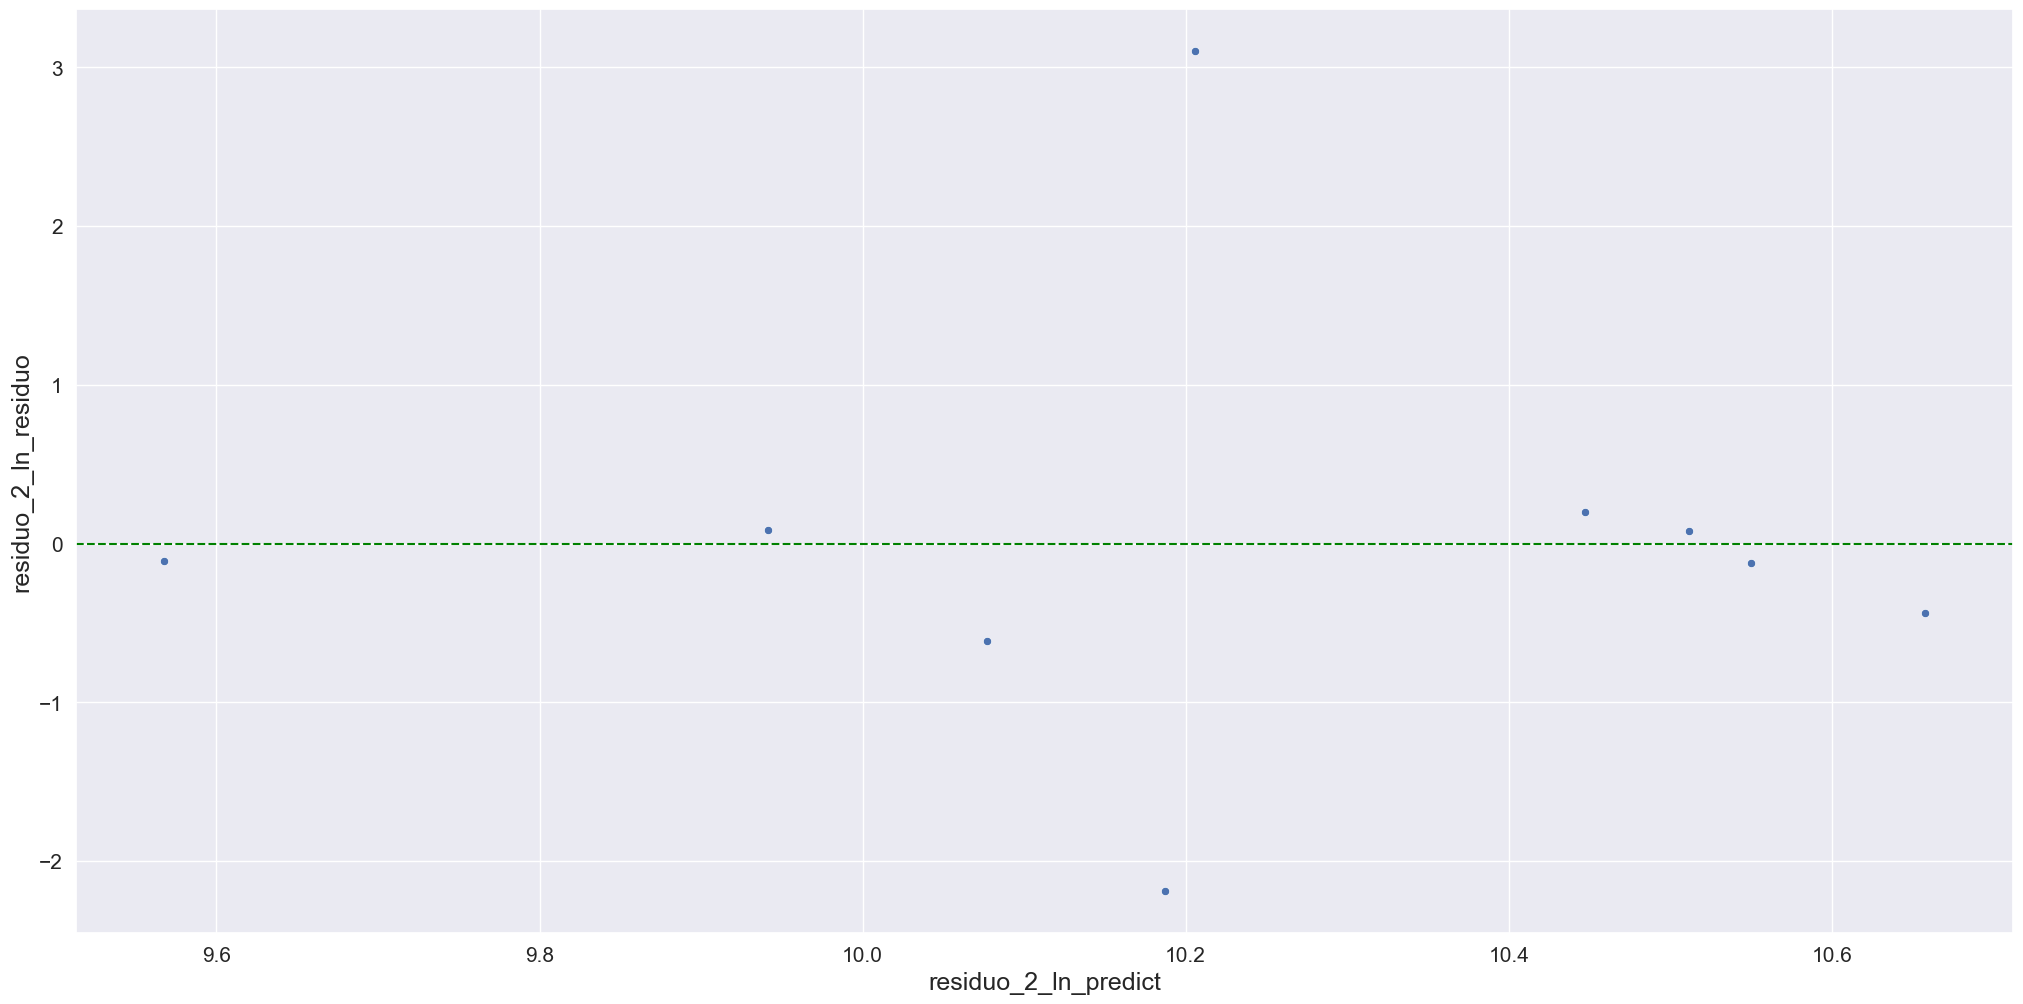

In [29]:
sns.scatterplot(data = data, x = 'residuo_2_ln_predict',y='residuo_2_ln_residuo');
plt.axhline(y = 0, color ="green", linestyle ="--");

## Exemplo 11.2 - Detecção da Heterocesdasticidade

### Método -  Teste de Glejser - Cálculo regressão dos resíduos contra $X_{i}$

In [30]:
data = pd.read_excel('datasets/tabela_11.1_2.xlsx')
data

desvio_padrao  produtividade  remuneracao
0       742.2000      9355.0000         3396
1       851.4000      8584.0000         3787
2       727.8000      7962.0000         4013
3       805.0600      8275.0000         4104
4       929.9000      8389.0000         4146
5      1080.6000      9418.0000         4241
6      1241.2000      9795.0000         4388
7      1307.7000     10281.0000         4538
8      1110.7000     11750.0000         4843

In [31]:
x = data[['produtividade']]
y = data['remuneracao']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)

data['predictions'] = predictions
data['residuo'] = model.resid

summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:            remuneracao   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     5.445
Date:                Sat, 10 Jun 2023   Prob (F-statistic):             0.0523
Time:                        20:33:25   Log-Likelihood:                -64.028
No. Observations:                   9   AIC:                             132.1
Df Residuals:                       7   BIC:                             132.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1992.0621    936.612      2.127

/home/deivison/Documentos/projetos/venv_jupyter3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Modelo transformado

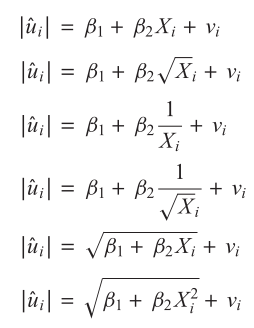

In [32]:
Image('./imagens/cap_11_exemplo_11.2_2.png')

In [33]:
data['residuo_abs'] = np.abs(data['residuo'])
data

desvio_padrao  produtividade  remuneracao  predictions   residuo  residuo_abs
0       742.2000      9355.0000         3396    4171.7709 -775.7709     775.7709
1       851.4000      8584.0000         3787    3992.1284 -205.1284     205.1284
2       727.8000      7962.0000         4013    3847.2028  165.7972     165.7972
3       805.0600      8275.0000         4104    3920.1316  183.8684     183.8684
4       929.9000      8389.0000         4146    3946.6935  199.3065     199.3065
5      1080.6000      9418.0000         4241    4186.4498   54.5502      54.5502
6      1241.2000      9795.0000         4388    4274.2906  113.7094     113.7094
7      1307.7000     10281.0000         4538    4387.5282  150.4718     150.4718
8      1110.7000     11750.0000         4843    4729.8043  113.1957     113.1957

In [34]:
# modelo
x = data[['produtividade']]
y = data['residuo_abs']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predicitons = model.predict(x)
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:            residuo_abs   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.128
Method:                 Least Squares   F-statistic:                   0.09088
Date:                Sat, 10 Jun 2023   Prob (F-statistic):              0.772
Time:                        20:33:25   Log-Likelihood:                -60.504
No. Observations:                   9   AIC:                             125.0
Df Residuals:                       7   BIC:                             125.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           407.4760    633.189      0.644

/home/deivison/Documentos/projetos/venv_jupyter3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Exemplo 11.3 Teste de correlação por ordem de Spearman

In [35]:
data = pd.read_excel('./datasets/tabela_11.2.xlsx')
data

fundo  retorno_anual  desvio_anual
0        Boston         12.4000       12.1000
1       Delaware        14.4000       21.4000
2         Equity        14.6000       18.7000
3    Fundamental        16.0000       21.7000
4         Mutual        11.3000       12.5000
5         Loomis        10.0000       10.4000
6  Massachusetts        16.2000       20.8000
7            New        10.4000       10.2000
8         Putnam        13.1000       16.0000
9     Wellington        11.3000       12.0000

### Etapa 1: Ajuste a regressão aos dados em Y e X e obtenha os resíduos

In [36]:
# modelo retorno x desvio
x = data[['desvio_anual']]
y = data['retorno_anual']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()

data['predictions'] = model.predict(x)
data['residuo'] = model.resid

data

fundo  retorno_anual  desvio_anual  predictions  residuo
0        Boston         12.4000       12.1000      11.3728   1.0272
1       Delaware        14.4000       21.4000      15.6411  -1.2411
2         Equity        14.6000       18.7000      14.4019   0.1981
3    Fundamental        16.0000       21.7000      15.7788   0.2212
4         Mutual        11.3000       12.5000      11.5564  -0.2564
5         Loomis        10.0000       10.4000      10.5926  -0.5926
6  Massachusetts        16.2000       20.8000      15.3658   0.8342
7            New        10.4000       10.2000      10.5008  -0.1008
8         Putnam        13.1000       16.0000      13.1628  -0.0628
9     Wellington        11.3000       12.0000      11.3269  -0.0269

In [37]:
data['residuo_abs'] = np.abs(data['residuo'])
data

fundo  retorno_anual  desvio_anual  predictions  residuo  residuo_abs
0        Boston         12.4000       12.1000      11.3728   1.0272       1.0272
1       Delaware        14.4000       21.4000      15.6411  -1.2411       1.2411
2         Equity        14.6000       18.7000      14.4019   0.1981       0.1981
3    Fundamental        16.0000       21.7000      15.7788   0.2212       0.2212
4         Mutual        11.3000       12.5000      11.5564  -0.2564       0.2564
5         Loomis        10.0000       10.4000      10.5926  -0.5926       0.5926
6  Massachusetts        16.2000       20.8000      15.3658   0.8342       0.8342
7            New        10.4000       10.2000      10.5008  -0.1008       0.1008
8         Putnam        13.1000       16.0000      13.1628  -0.0628       0.0628
9     Wellington        11.3000       12.0000      11.3269  -0.0269       0.0269

### Ordene considerando os valores absolutos dos residuos e valores de $X_{i}$

In [38]:
# ordem residuos absolutos
data = data.sort_values('residuo_abs', ascending = True).reset_index(drop=True)

In [39]:
data['index_abs'] = data.index

In [40]:
data

fundo  retorno_anual  desvio_anual  predictions  residuo  residuo_abs  index_abs
0     Wellington        11.3000       12.0000      11.3269  -0.0269       0.0269          0
1         Putnam        13.1000       16.0000      13.1628  -0.0628       0.0628          1
2            New        10.4000       10.2000      10.5008  -0.1008       0.1008          2
3         Equity        14.6000       18.7000      14.4019   0.1981       0.1981          3
4    Fundamental        16.0000       21.7000      15.7788   0.2212       0.2212          4
5         Mutual        11.3000       12.5000      11.5564  -0.2564       0.2564          5
6         Loomis        10.0000       10.4000      10.5926  -0.5926       0.5926          6
7  Massachusetts        16.2000       20.8000      15.3658   0.8342       0.8342          7
8        Boston         12.4000       12.1000      11.3728   1.0272       1.0272          8
9       Delaware        14.4000       21.4000      15.6411  -1.2411       1.2411          9

In [41]:
# ordem Xi desvio padrao do retorno atual
data = data.sort_values('desvio_anual', ascending = True).reset_index(drop=True)

data['index_desvio'] = data.index

In [42]:
data

fundo  retorno_anual  desvio_anual  predictions  residuo  residuo_abs  index_abs  index_desvio
0            New        10.4000       10.2000      10.5008  -0.1008       0.1008          2             0
1         Loomis        10.0000       10.4000      10.5926  -0.5926       0.5926          6             1
2     Wellington        11.3000       12.0000      11.3269  -0.0269       0.0269          0             2
3        Boston         12.4000       12.1000      11.3728   1.0272       1.0272          8             3
4         Mutual        11.3000       12.5000      11.5564  -0.2564       0.2564          5             4
5         Putnam        13.1000       16.0000      13.1628  -0.0628       0.0628          1             5
6         Equity        14.6000       18.7000      14.4019   0.1981       0.1981          3             6
7  Massachusetts        16.2000       20.8000      15.3658   0.8342       0.8342          7             7
8       Delaware        14.4000       21.4000      15.6411  -1.2411       1.2411          9             8
9    Fundamental        16.0000       21.7000      15.7788   0.2212       0.2212          4             9

In [43]:
# diferenca entre duas classificacoes
data['d'] = data['index_abs']- data['index_desvio']

In [44]:
# diferenca ao quadrado
data['d2'] = np.square(data['d'])
data

fundo  retorno_anual  desvio_anual  predictions  residuo  residuo_abs  index_abs  index_desvio  d  d2
0            New        10.4000       10.2000      10.5008  -0.1008       0.1008          2             0  2   4
1         Loomis        10.0000       10.4000      10.5926  -0.5926       0.5926          6             1  5  25
2     Wellington        11.3000       12.0000      11.3269  -0.0269       0.0269          0             2 -2   4
3        Boston         12.4000       12.1000      11.3728   1.0272       1.0272          8             3  5  25
4         Mutual        11.3000       12.5000      11.5564  -0.2564       0.2564          5             4  1   1
5         Putnam        13.1000       16.0000      13.1628  -0.0628       0.0628          1             5 -4  16
6         Equity        14.6000       18.7000      14.4019   0.1981       0.1981          3             6 -3   9
7  Massachusetts        16.2000       20.8000      15.3658   0.8342       0.8342          7             7  0   0
8       Delaware        14.4000       21.4000      15.6411  -1.2411       1.2411          9             8  1   1
9    Fundamental        16.0000       21.7000      15.7788   0.2212       0.2212          4             9 -5  25

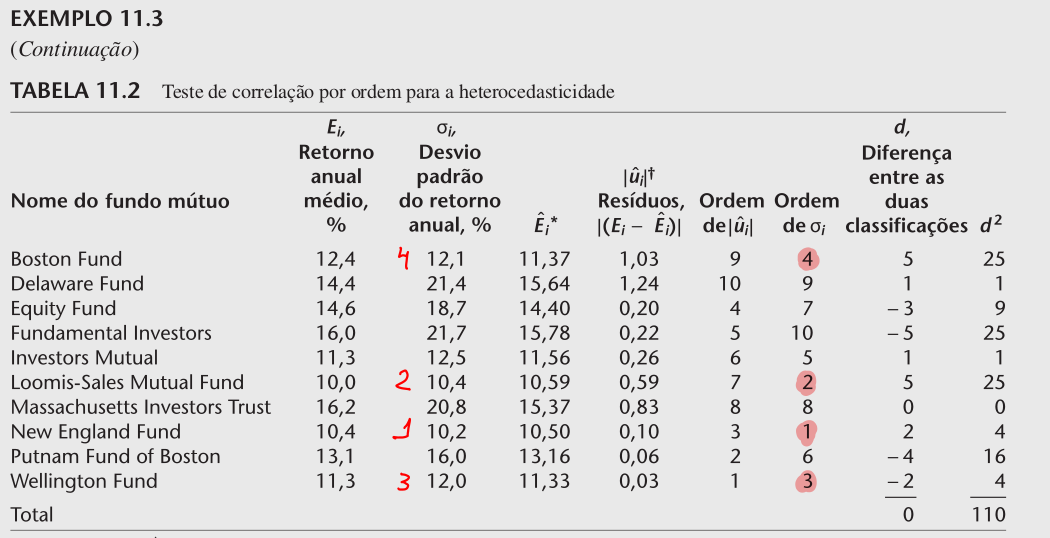

In [45]:
Image('./imagens/cap_11_exemplo_11.3_2.png')

In [46]:
d2 = data['d2'].sum()
d2

110

In [47]:
data['d'].sum()

0

In [48]:
n = data.shape[0]
n

10

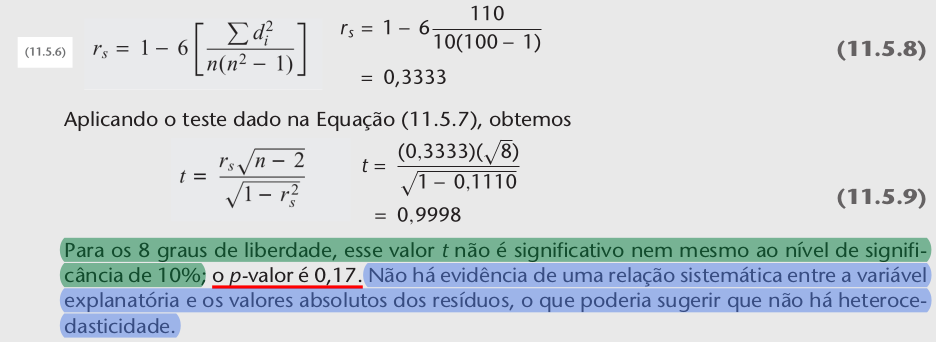

In [49]:
Image('./imagens/cap_11_exemplo_11.3_1.png')

In [50]:
# coeficiente de pearson
rs = 1-( 6*( d2 / ( n*(n**2-1) ) ))
rs

0.33333333333333337

In [51]:
# valor t
t_calculado = (rs*np.sqrt(n-2))/np.sqrt(1-rs**2)
t_calculado

1.0000000000000002

In [52]:
# 10% de significancia duas caudas
valor_t = stats.t.ppf(q = 0.95, df = 8)
valor_t

1.8595480375228424

In [53]:
# Conclusão do Teste de correlação por ordem de Spearman
t_calculado<valor_t

True

**<font color=red>Não há Heterocedasticidade na variância do erro.</font>**

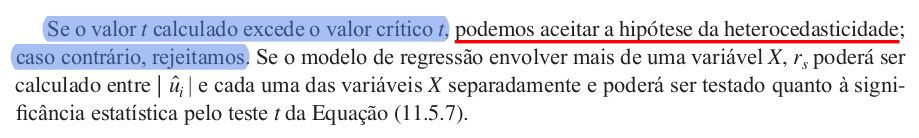

In [54]:
Image('./imagens/cap_11_exemplo_11.3_3.png')

## Exemplo 11.4 Teste de Goldfeld-Quandt

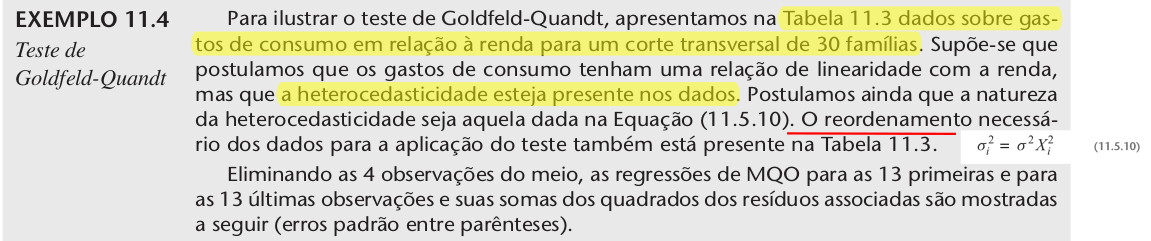

In [55]:
Image('./imagens/cap_11_exemplo_11.4_1.png')

### Dataset

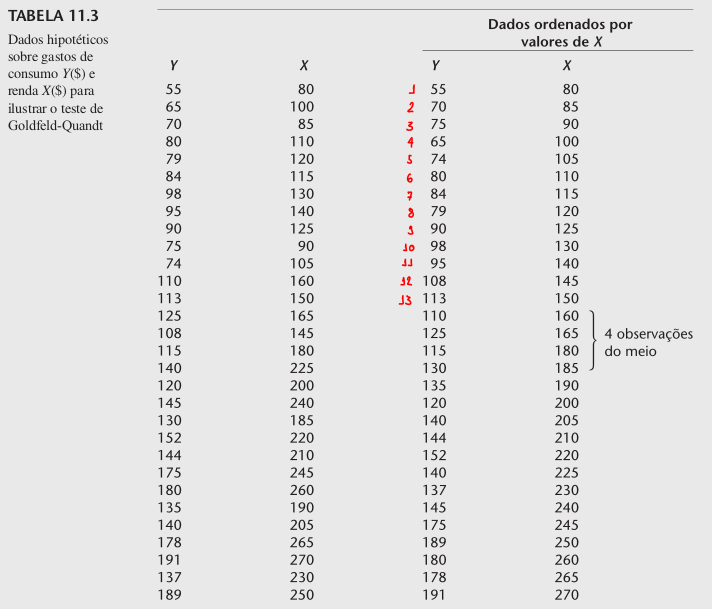

In [56]:
Image('./imagens/cap_11_tabela_11.3_1.png')

In [57]:
y = [55, 65, 70, 80, 79, 84, 98, 95, 90, 75, 74, 110, 113, 125, 108, 115, 140, 120, 145, 130, 152, 144, 175, 180, 135, 140, 178, 191, 137, 189]

x = [80, 100, 85, 110, 120, 115, 130, 140, 125, 90, 105, 160, 150, 165, 145, 180, 225, 200, 240, 185, 220, 210, 245, 260, 190, 205, 265, 270, 230, 250]

aux = zip(y,x)

data = pd.DataFrame(aux,columns = ['y', 'x'])

data

y    x
0    55   80
1    65  100
2    70   85
3    80  110
4    79  120
5    84  115
6    98  130
7    95  140
8    90  125
9    75   90
10   74  105
11  110  160
12  113  150
13  125  165
14  108  145
15  115  180
16  140  225
17  120  200
18  145  240
19  130  185
20  152  220
21  144  210
22  175  245
23  180  260
24  135  190
25  140  205
26  178  265
27  191  270
28  137  230
29  189  250

### Etapa 1: Odernando dataset de acordo com valores de xi

In [58]:
data2 = data.sort_values('x', ascending = True).reset_index(drop=True)
data2

y    x
0    55   80
1    70   85
2    75   90
3    65  100
4    74  105
5    80  110
6    84  115
7    79  120
8    90  125
9    98  130
10   95  140
11  108  145
12  113  150
13  110  160
14  125  165
15  115  180
16  130  185
17  135  190
18  120  200
19  140  205
20  144  210
21  152  220
22  140  225
23  137  230
24  145  240
25  175  245
26  189  250
27  180  260
28  178  265
29  191  270

### Etapa 2: Omitir c observações centrais e ajuste das regressões

In [59]:
def ajuste_goldfeld_quandt(data,c):
    n = data.shape[0]
    k = data.shape[1]-1
    ajuste = int((n-c)/2)
    
    data_e1 = data[0:ajuste]
    
    aux = int(ajuste+c)
    data_e2 = data[aux::]
    
    data_c = data[ajuste:aux]
    
    return data_e1, data_e2, data_c
    

In [60]:
aux1,aux2, aux3 = ajuste_goldfeld_quandt(data2,4)

In [61]:
aux1

y    x
0    55   80
1    70   85
2    75   90
3    65  100
4    74  105
5    80  110
6    84  115
7    79  120
8    90  125
9    98  130
10   95  140
11  108  145
12  113  150

In [62]:
aux2

y    x
17  135  190
18  120  200
19  140  205
20  144  210
21  152  220
22  140  225
23  137  230
24  145  240
25  175  245
26  189  250
27  180  260
28  178  265
29  191  270

In [63]:
aux3

y    x
13  110  160
14  125  165
15  115  180
16  130  185

### Regressão primeiro corte

In [64]:
x = aux1[['x']]
y = aux1['y']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     87.79
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           1.41e-06
Time:                        20:33:26   Log-Likelihood:                -40.336
No. Observations:                  13   AIC:                             84.67
Df Residuals:                      11   BIC:                             85.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4094      8.705      0.392      0.7

/home/deivison/Documentos/projetos/venv_jupyter3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [65]:
model.resid

0    -4.1514
1     7.3648
2     8.8809
3    -8.0868
4    -2.5707
5    -0.0546
6     0.4615
7    -8.0223
8    -0.5062
9     4.0099
10   -5.9578
11    3.5583
12    5.0744
dtype: float64

In [66]:
sqr1 = np.sum(np.power(model.resid,2))
sqr1

377.1662531017369

In [67]:
gl1 = model.df_resid
gl1

11.0

In [68]:
v1= model.resid

### Regressão segundo corte

In [69]:
x = aux2[['x']]
y = aux2['y']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     36.42
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           8.49e-05
Time:                        20:33:26   Log-Likelihood:                -49.468
No. Observations:                  13   AIC:                             102.9
Df Residuals:                      11   BIC:                             104.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -28.0272     30.642     -0.915      0.3

/home/deivison/Documentos/projetos/venv_jupyter3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [70]:
sqr2 = sum((model.resid)**2)
sqr2

1536.7995710200187

In [71]:
gl2 = model.df_resid
gl2

11.0

In [72]:
v2= model.resid

### Valor crítico cálculado ${\lambda}$

In [73]:
lambda_ = (sqr2/gl2)/(sqr1/gl1)
lambda_

4.074594580988353

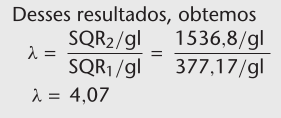

In [74]:
Image('./imagens/cap_11_exemplo_11.4_2.png')

### Valor crítico de F - 11 graus de liberdade

In [75]:
F_value = scipy.stats.f.ppf(q=1-0.05, dfn=11, dfd=11)
F_value

2.8179304699530863

In [76]:
p_valor = 1 - scipy.stats.f.cdf(2.8179, dfn=11, dfd=11)
p_valor

0.050001700230670854

### Teste F

**Hipótese nula**
* Ho: $\sigma_{1} = \sigma_{2}$ --> Variância aux1 = Variancia aux2

**lambda_ < F_value 5%**
* Não há Heterocedasticidade
* Variância aux1 = Variância aux2

**lambda_ > F_value 5%**
* Há Heterocedasticidade
* * Ho: $\sigma_{1} \neq \sigma_{2}$ --> Variância aux1 $\neq$ Variancia aux2

In [77]:
lambda_ < F_value

False

**<font color=red>Há Heterocedasticidade na variância do erro.</font>**

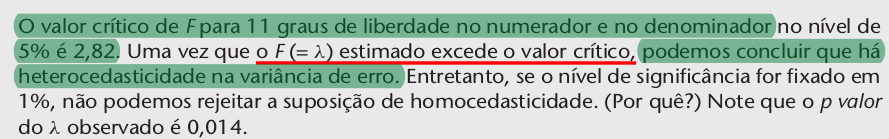

In [78]:
Image('./imagens/cap_11_exemplo_11.4_3.png')

## Exemplo 11.5 - Teste de Breusch-Pagan-Godfrey

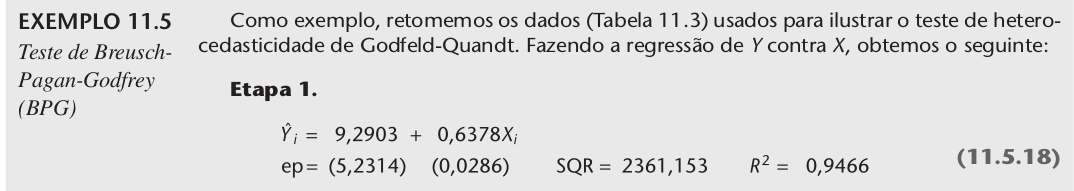

In [79]:
Image('./imagens/cap_11_exemplo_11.5_1.png')

### Dataset

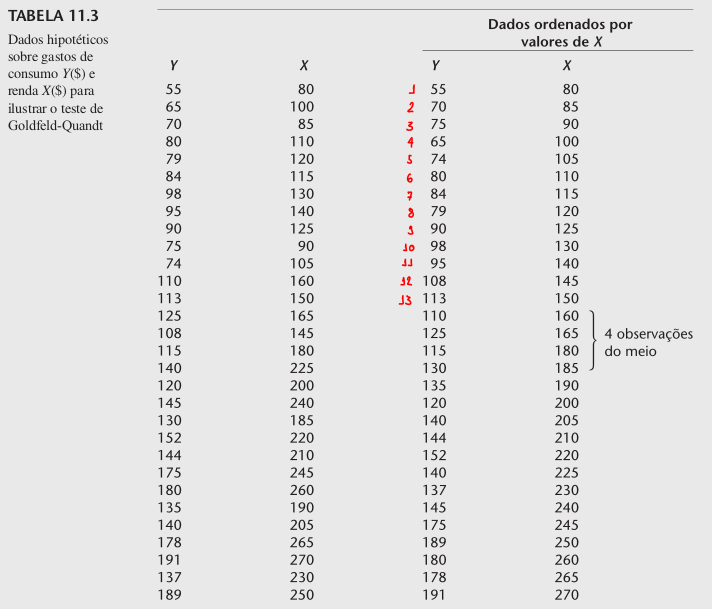

In [80]:
Image('./imagens/cap_11_tabela_11.3_1.png')

In [81]:
y = [55, 65, 70, 80, 79, 84, 98, 95, 90, 75, 74, 110, 113, 125, 108, 115, 140, 120, 145, 130, 152, 144, 175, 180, 135, 140, 178, 191, 137, 189]

x = [80, 100, 85, 110, 120, 115, 130, 140, 125, 90, 105, 160, 150, 165, 145, 180, 225, 200, 240, 185, 220, 210, 245, 260, 190, 205, 265, 270, 230, 250]

aux = zip(y,x)

data = pd.DataFrame(aux,columns = ['y', 'x'])

data

y    x
0    55   80
1    65  100
2    70   85
3    80  110
4    79  120
5    84  115
6    98  130
7    95  140
8    90  125
9    75   90
10   74  105
11  110  160
12  113  150
13  125  165
14  108  145
15  115  180
16  140  225
17  120  200
18  145  240
19  130  185
20  152  220
21  144  210
22  175  245
23  180  260
24  135  190
25  140  205
26  178  265
27  191  270
28  137  230
29  189  250

### Etapa 1 Regressão y contra x

In [82]:
x = data[['x']]
y = data['y']
x= sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     496.7
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           2.33e-19
Time:                        20:33:26   Log-Likelihood:                -108.05
No. Observations:                  30   AIC:                             220.1
Df Residuals:                      28   BIC:                             222.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2903      5.231      1.776      0.0

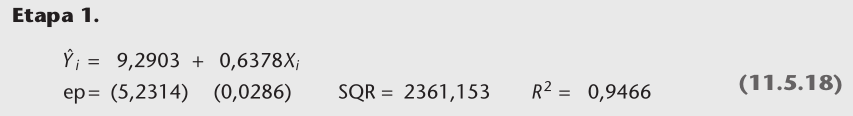

In [83]:
Image('./imagens/cap_11_exemplo_11.5_2.png')

### Etapa 2: Cálculo do Estimador de máxima verossimilhança

In [84]:
residuo = model.resid

In [85]:
data['residuo'] = model.resid
data['residuo_2'] = np.square(data['residuo'])
data

y    x  residuo  residuo_2
0    55   80  -5.3131    28.2287
1    65  100  -8.0688    65.1049
2    70   85   6.4980    42.2241
3    80  110   0.5534     0.3062
4    79  120  -6.8245    46.5732
5    84  115   1.3645     1.8618
6    98  130   5.7977    33.6133
7    95  140  -3.5801    12.8174
8    90  125   0.9866     0.9734
9    75   90   8.3091    69.0408
10   74  105  -2.2577     5.0971
11  110  160  -1.3358     1.7845
12  113  150   8.0420    64.6739
13  125  165  10.4752   109.7307
14  108  145   6.2309    38.8245
15  115  180  -9.0915    82.6559
16  140  225 -12.7918   163.6310
17  120  200 -16.8472   283.8288
18  145  240 -17.3586   301.3210
19  130  185   2.7195     7.3959
20  152  220   2.3971     5.7460
21  144  210   0.7749     0.6005
22  175  245   9.4525    89.3493
23  180  260   4.8857    23.8701
24  135  190   4.5306    20.5266
25  140  205  -0.0361     0.0013
26  178  265  -0.3032     0.0919
27  191  270   9.5079    90.3994
28  137  230 -18.9808   360.2691
29  189  250  20.2636   410.6116

In [86]:
em = data['residuo_2'].sum() / data.shape[0]
em

78.70510834702344

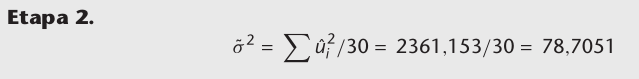

In [87]:
Image('./imagens/cap_11_exemplo_11.5_3.png')

### Etapa 3: Variáveis $p_{i}$

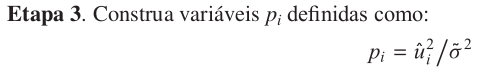

In [88]:
Image('./imagens/cap_11_exemplo_11.5_4.png')

In [89]:
data['pi'] = data['residuo_2'] / em
data

y    x  residuo  residuo_2     pi
0    55   80  -5.3131    28.2287 0.3587
1    65  100  -8.0688    65.1049 0.8272
2    70   85   6.4980    42.2241 0.5365
3    80  110   0.5534     0.3062 0.0039
4    79  120  -6.8245    46.5732 0.5917
5    84  115   1.3645     1.8618 0.0237
6    98  130   5.7977    33.6133 0.4271
7    95  140  -3.5801    12.8174 0.1629
8    90  125   0.9866     0.9734 0.0124
9    75   90   8.3091    69.0408 0.8772
10   74  105  -2.2577     5.0971 0.0648
11  110  160  -1.3358     1.7845 0.0227
12  113  150   8.0420    64.6739 0.8217
13  125  165  10.4752   109.7307 1.3942
14  108  145   6.2309    38.8245 0.4933
15  115  180  -9.0915    82.6559 1.0502
16  140  225 -12.7918   163.6310 2.0790
17  120  200 -16.8472   283.8288 3.6062
18  145  240 -17.3586   301.3210 3.8285
19  130  185   2.7195     7.3959 0.0940
20  152  220   2.3971     5.7460 0.0730
21  144  210   0.7749     0.6005 0.0076
22  175  245   9.4525    89.3493 1.1352
23  180  260   4.8857    23.8701 0.3033
24  135  190   4.5306    20.5266 0.2608
25  140  205  -0.0361     0.0013 0.0000
26  178  265  -0.3032     0.0919 0.0012
27  191  270   9.5079    90.3994 1.1486
28  137  230 -18.9808   360.2691 4.5775
29  189  250  20.2636   410.6116 5.2171

### Etapa 4: Regressão de $p_{i}$ versus $x_{i}$

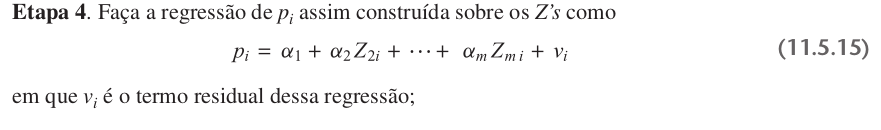

In [90]:
Image('./imagens/cap_11_exemplo_11.5_5.png')

In [91]:
x = data[['x']]
y = data['pi']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                     pi   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     5.970
Date:                Sat, 10 Jun 2023   Prob (F-statistic):             0.0211
Time:                        20:33:26   Log-Likelihood:                -49.900
No. Observations:                  30   AIC:                             103.8
Df Residuals:                      28   BIC:                             106.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7426      0.753     -0.986      0.3

In [92]:
data['predictions_pi'] = model.predict(x)
data['qe'] = np.power( (data['predictions_pi'] - data['pi'].mean()), 2 )
data

y    x  residuo  residuo_2     pi  predictions_pi     qe
0    55   80  -5.3131    28.2287 0.3587          0.0624 0.8790
1    65  100  -8.0688    65.1049 0.8272          0.2637 0.5421
2    70   85   6.4980    42.2241 0.5365          0.1128 0.7872
3    80  110   0.5534     0.3062 0.0039          0.3643 0.4041
4    79  120  -6.8245    46.5732 0.5917          0.4650 0.2863
5    84  115   1.3645     1.8618 0.0237          0.4147 0.3426
6    98  130   5.7977    33.6133 0.4271          0.5656 0.1887
7    95  140  -3.5801    12.8174 0.1629          0.6662 0.1114
8    90  125   0.9866     0.9734 0.0124          0.5153 0.2349
9    75   90   8.3091    69.0408 0.8772          0.1631 0.7004
10   74  105  -2.2577     5.0971 0.0648          0.3140 0.4706
11  110  160  -1.3358     1.7845 0.0227          0.8675 0.0176
12  113  150   8.0420    64.6739 0.8217          0.7669 0.0544
13  125  165  10.4752   109.7307 1.3942          0.9178 0.0068
14  108  145   6.2309    38.8245 0.4933          0.7166 0.0803
15  115  180  -9.0915    82.6559 1.0502          1.0688 0.0047
16  140  225 -12.7918   163.6310 2.0790          1.5216 0.2721
17  120  200 -16.8472   283.8288 3.6062          1.2700 0.0729
18  145  240 -17.3586   301.3210 3.8285          1.6726 0.4523
19  130  185   2.7195     7.3959 0.0940          1.1191 0.0142
20  152  220   2.3971     5.7460 0.0730          1.4713 0.2221
21  144  210   0.7749     0.6005 0.0076          1.3707 0.1374
22  175  245   9.4525    89.3493 1.1352          1.7229 0.5225
23  180  260   4.8857    23.8701 0.3033          1.8738 0.7636
24  135  190   4.5306    20.5266 0.2608          1.1694 0.0287
25  140  205  -0.0361     0.0013 0.0000          1.3203 0.1026
26  178  265  -0.3032     0.0919 0.0012          1.9241 0.8540
27  191  270   9.5079    90.3994 1.1486          1.9745 0.9496
28  137  230 -18.9808   360.2691 4.5775          1.5719 0.3271
29  189  250  20.2636   410.6116 5.2171          1.7732 0.5978

In [93]:
SQE = data['qe'].sum()
SQE

10.42802152510041

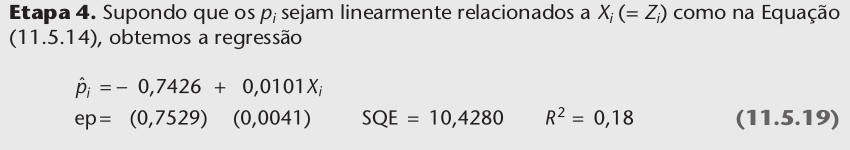

In [94]:
Image('./imagens/cap_11_exemplo_11.5_6.png')

### Etapa 5: Estatística do teste

#### Valor crítico cálculado ${\Theta}$

In [95]:
theta = SQE/2
theta

5.214010762550205

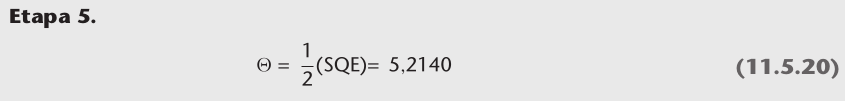

In [96]:
Image('./imagens/cap_11_exemplo_11.5_7.png')

### Valor crítico de $\chi$ - 1 grau de liberdade

In [97]:
# 5%
qui_value = scipy.stats.chi2.ppf(q=1-0.05, df=1)
qui_value

3.841458820694124

In [98]:
# 1%
qui_value = scipy.stats.chi2.ppf(q=1-0.01, df=1)
qui_value

6.6348966010212145

In [99]:
p_valor = 1 - scipy.stats.chi2.cdf(3.8414, df=1)
p_valor

0.050001754033908385

In [100]:
p_valor = 1 - scipy.stats.chi2.cdf(6.6348, df=1)
p_valor

0.010000542297100123

### Teste Chi2

**Hipótese nula**
* Ho: $\beta_{2}= 0$ --> regressão de $p_{i}$ contra $x_{i}$ 

**$\theta < \chi$_value 5%**
* Não há Heterocedasticidade
* $\beta_{2} = 0$ --> variância do erro homocedástica

**$\theta > \chi$_value 5%**
* Há Heterocedasticidade
* * Ho: $\beta_{2} \neq 0$ --> variância do erro heterocedástica

In [101]:
theta < qui_value

True

**<font color=red>Há Heterocedasticidade na variância do erro.</font>**

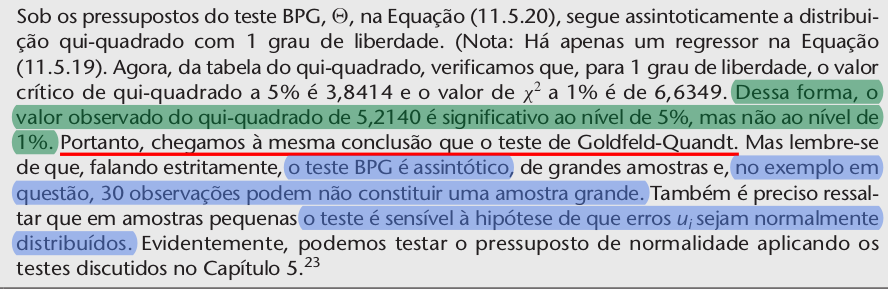

In [102]:
Image('./imagens/cap_11_exemplo_11.5_8.png')

# 11.6 Medidas Corretivas

## Exemplo 11.7 - MQP Mínimos Quadrados Ponderados

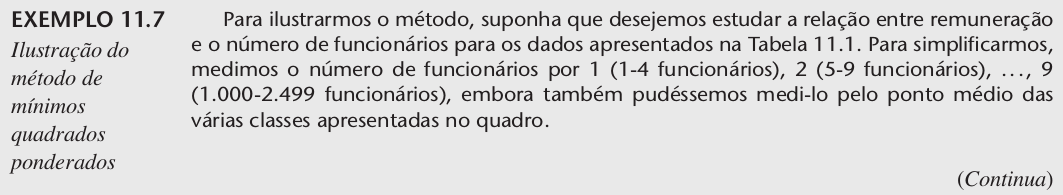

In [103]:
Image('./imagens/cap_11_exemplo_11.7_1.png')

In [104]:
data = pd.read_excel('datasets/tabela_11.1_2.xlsx')
data

desvio_padrao  produtividade  remuneracao
0       742.2000      9355.0000         3396
1       851.4000      8584.0000         3787
2       727.8000      7962.0000         4013
3       805.0600      8275.0000         4104
4       929.9000      8389.0000         4146
5      1080.6000      9418.0000         4241
6      1241.2000      9795.0000         4388
7      1307.7000     10281.0000         4538
8      1110.7000     11750.0000         4843

In [105]:
data['funcionarios'] = list(np.arange(1,10,1))
data

desvio_padrao  produtividade  remuneracao  funcionarios
0       742.2000      9355.0000         3396             1
1       851.4000      8584.0000         3787             2
2       727.8000      7962.0000         4013             3
3       805.0600      8275.0000         4104             4
4       929.9000      8389.0000         4146             5
5      1080.6000      9418.0000         4241             6
6      1241.2000      9795.0000         4388             7
7      1307.7000     10281.0000         4538             8
8      1110.7000     11750.0000         4843             9

### Dataset - Ponderado

In [106]:
data['remuneracao_p']  = data['remuneracao'] / data['desvio_padrao']
data['funcionarios_p'] = data['funcionarios'] / data['desvio_padrao']
data['inverso_desvio'] = 1 / data['desvio_padrao']
data

desvio_padrao  produtividade  remuneracao  funcionarios  remuneracao_p  funcionarios_p  inverso_desvio
0       742.2000      9355.0000         3396             1         4.5756          0.0013          0.0013
1       851.4000      8584.0000         3787             2         4.4480          0.0023          0.0012
2       727.8000      7962.0000         4013             3         5.5139          0.0041          0.0014
3       805.0600      8275.0000         4104             4         5.0978          0.0050          0.0012
4       929.9000      8389.0000         4146             5         4.4585          0.0054          0.0011
5      1080.6000      9418.0000         4241             6         3.9247          0.0056          0.0009
6      1241.2000      9795.0000         4388             7         3.5353          0.0056          0.0008
7      1307.7000     10281.0000         4538             8         3.4702          0.0061          0.0008
8      1110.7000     11750.0000         4843             9         4.3603          0.0081          0.0009

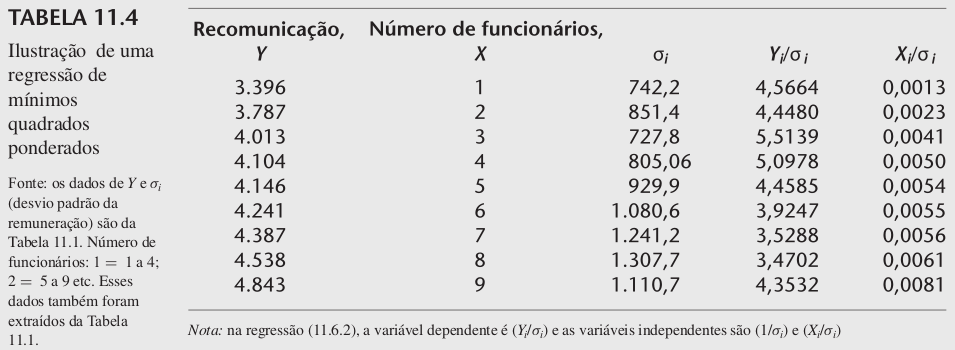

In [107]:
Image('./imagens/cap_11_exemplo_11.7_2.png')

### Regressão MQP

In [108]:
x = data[['inverso_desvio','funcionarios_p']]
y = data['remuneracao_p']
# modelo sem intercepto - existe uma relação de proporcionalidade entre a remuneracao media e o numero de funcionarios da empresa
# maiores empresas - maiores remuneracoes medias
#x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
summary = model.summary()
print(summary)

                                 OLS Regression Results                                
Dep. Variable:          remuneracao_p   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              4808.
Date:                Sat, 10 Jun 2023   Prob (F-statistic):                    1.04e-11
Time:                        20:33:26   Log-Likelihood:                          6.3683
No. Observations:                   9   AIC:                                     -8.737
Df Residuals:                       7   BIC:                                     -8.342
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

/home/deivison/Documentos/projetos/venv_jupyter3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


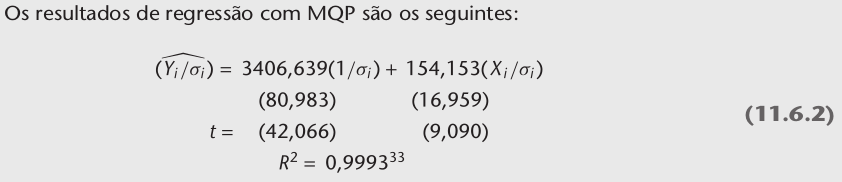

In [109]:
Image('./imagens/cap_11_exemplo_11.7_4.png')

### Regressao sem transformacao

In [110]:
data[['remuneracao','funcionarios']]

remuneracao  funcionarios
0         3396             1
1         3787             2
2         4013             3
3         4104             4
4         4146             5
5         4241             6
6         4388             7
7         4538             8
8         4843             9

In [111]:
x = data[['funcionarios']]
y = data['remuneracao']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:            remuneracao   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     106.7
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           1.73e-05
Time:                        20:33:26   Log-Likelihood:                -54.073
No. Observations:                   9   AIC:                             112.1
Df Residuals:                       7   BIC:                             112.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3417.7778     81.070     42.159   

/home/deivison/Documentos/projetos/venv_jupyter3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


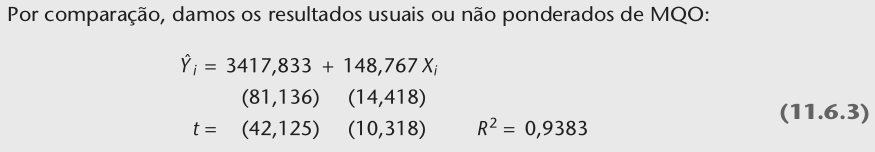

In [112]:
Image('./imagens/cap_11_exemplo_11.7_5.png')

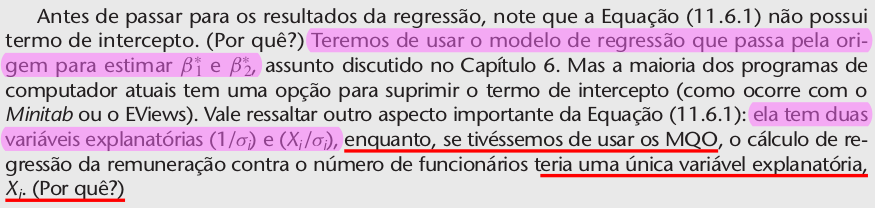

In [113]:
Image('./imagens/cap_11_exemplo_11.7_3.png')

# Exemplos Finais

## Exemplo 11.9 Mortalidade Infantil

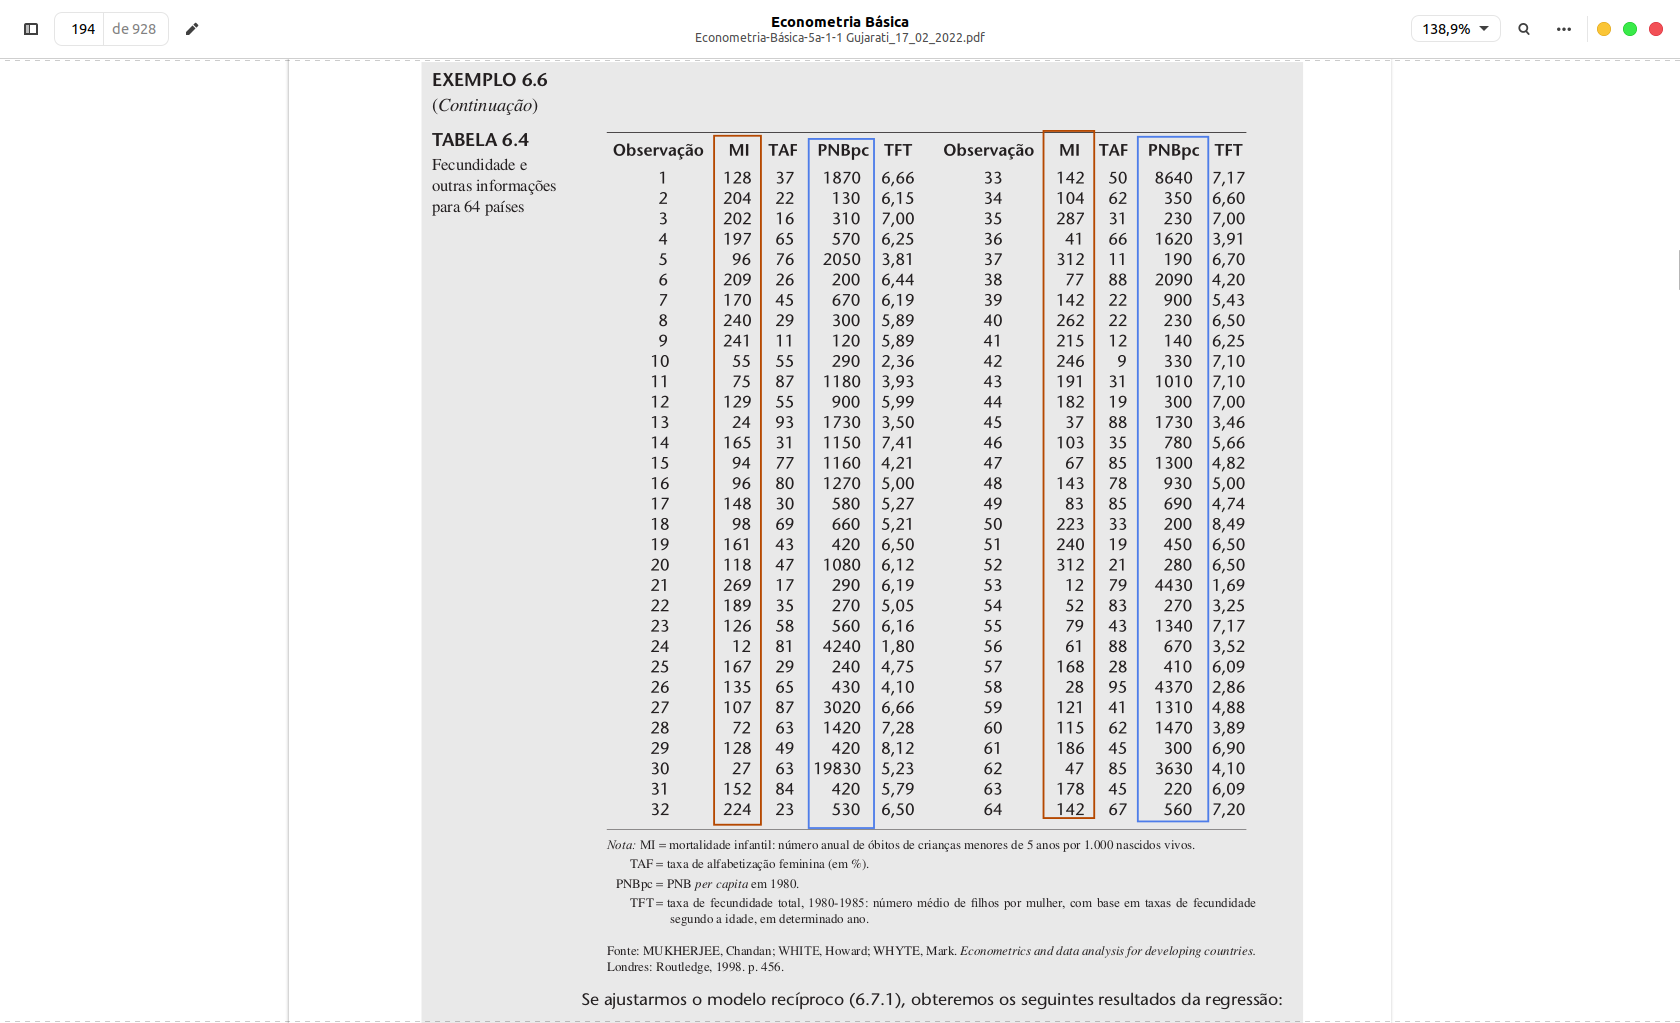

In [114]:
Image( './imagens/exemplo_6.6_2.png')

In [115]:
data = pd.read_excel('./datasets/tabela_6.4.xlsx')
data.head()

observacao   mi  taf  pnbpc    tft
0           1  128   37   1870 6.6600
1           2  204   22    130 6.1500
2           3  202   16    310 7.0000
3           4  197   65    570 6.2500
4           5   96   76   2050 3.8100

### Dataset com os resíduos

In [116]:
x = data[['taf','pnbpc']]
y = data['mi']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                     mi   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     73.83
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           5.12e-17
Time:                        20:33:27   Log-Likelihood:                -328.10
No. Observations:                  64   AIC:                             662.2
Df Residuals:                      61   BIC:                             668.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        263.6416     11.593     22.741      0.0

In [117]:
data['predictions'] = predictions
data['residuos'] = model.resid
data.head(10)

observacao   mi  taf  pnbpc    tft  predictions  residuos
0           1  128   37   1870 6.6600     170.5138  -42.5138
1           2  204   22    130 6.1500     213.8126   -9.8126
2           3  202   16    310 7.0000     226.1858  -24.1858
3           4  197   65    570 6.2500     115.3700   81.6300
4           5   96   76   2050 3.8100      82.4656   13.5344
5           6  209   26    200 6.4400     204.4910    4.5090
6           7  170   45    670 6.1900     159.4370   10.5630
7           8  240   29    300 5.8900     197.2316   42.7684
8           9  241   11    120 5.8900     238.4166    2.5834
9          10   55   55    290 2.3600     139.2669  -84.2669

#### Distribuição dos residuos

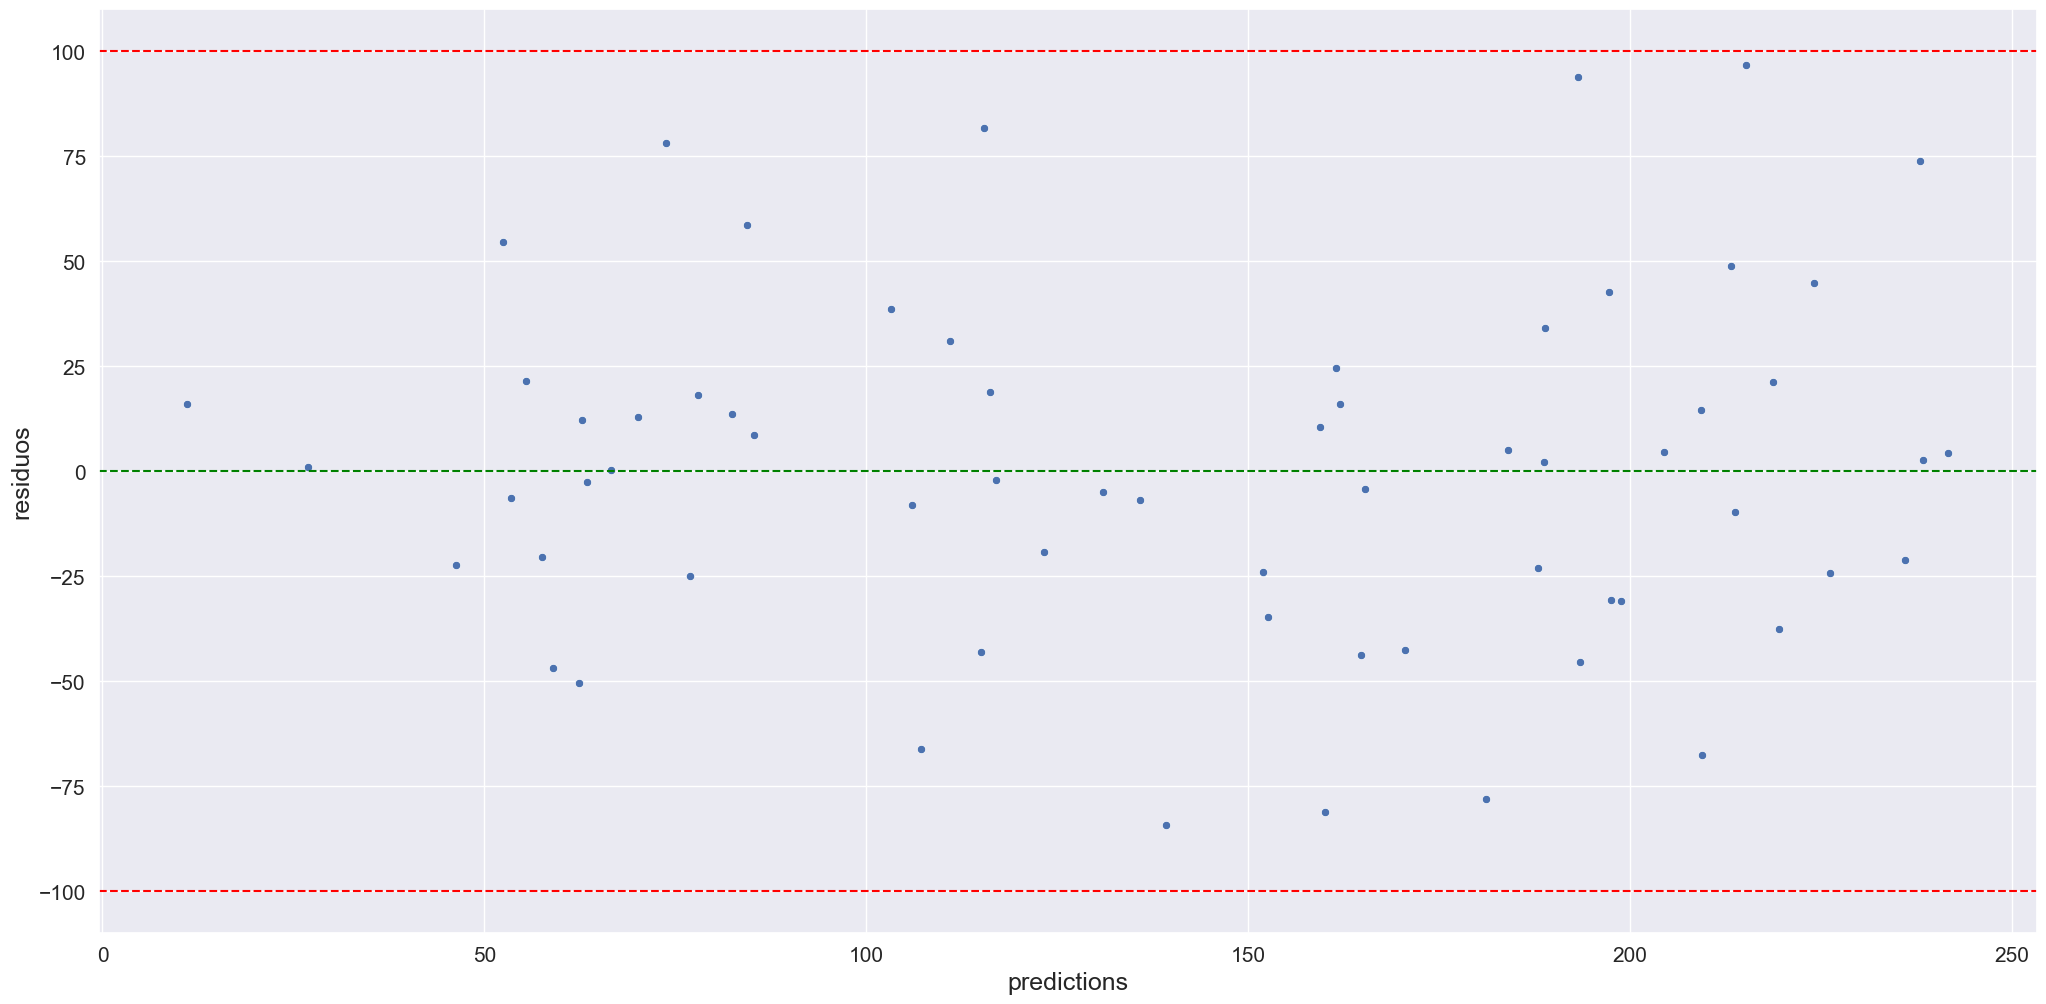

In [118]:
sns.scatterplot(data = data, x = 'predictions', y = 'residuos');
plt.axhline(y = 0, color ="green", linestyle ="--");
plt.axhline(y = 100, color ="red", linestyle ="--");
plt.axhline(y = -100, color ="red", linestyle ="--");

In [119]:
data['residuos_2'] = data['residuos']**2
data.head()

observacao   mi  taf  pnbpc    tft  predictions  residuos  residuos_2
0           1  128   37   1870 6.6600     170.5138  -42.5138   1807.4216
1           2  204   22    130 6.1500     213.8126   -9.8126     96.2879
2           3  202   16    310 7.0000     226.1858  -24.1858    584.9514
3           4  197   65    570 6.2500     115.3700   81.6300   6663.4644
4           5   96   76   2050 3.8100      82.4656   13.5344    183.1813

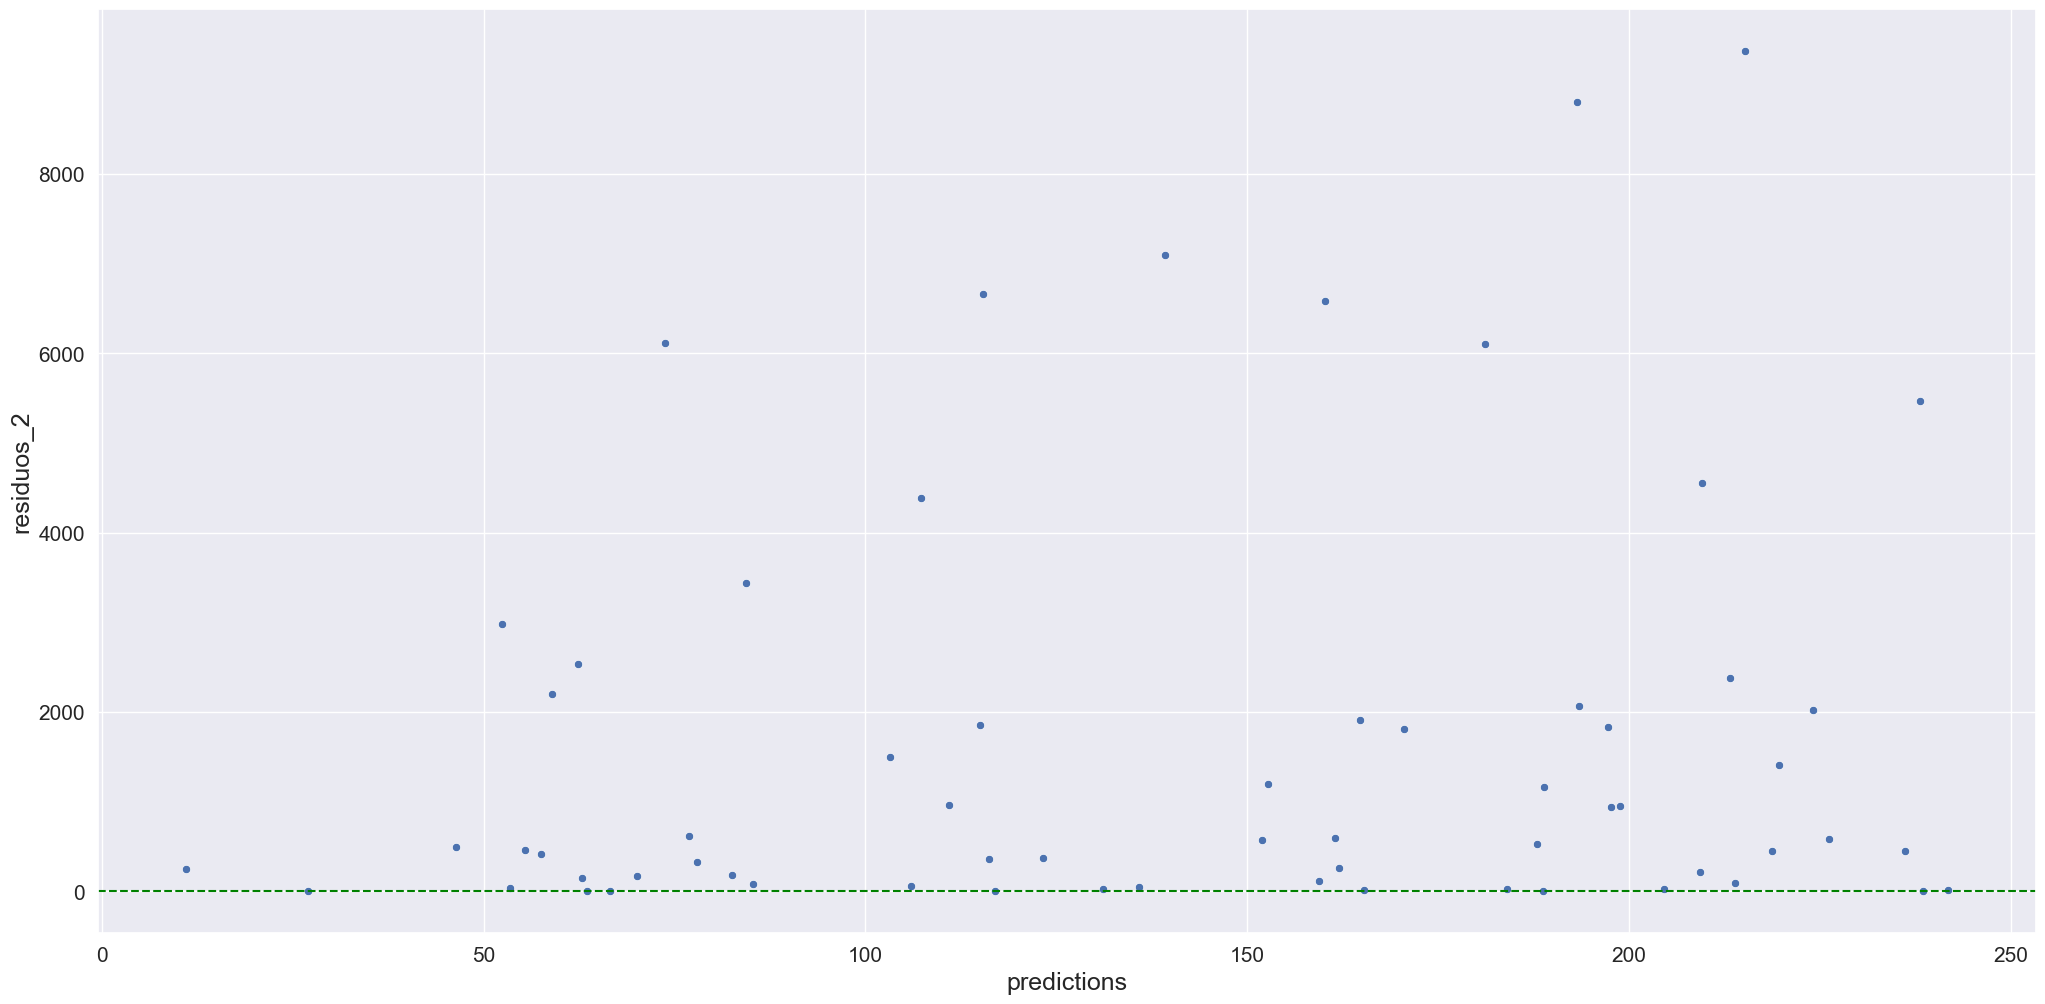

In [120]:
sns.scatterplot(data = data, x = 'predictions',y='residuos_2');
plt.axhline(y = 0, color ="green", linestyle ="--");
#plt.axhline(y = 200, color ="red", linestyle ="--");
#plt.axhline(y = -200, color ="red", linestyle ="--");

### Teste de Park

In [121]:
data['residuos_2'] = np.power(data['residuos'],2)
data.head()

observacao   mi  taf  pnbpc    tft  predictions  residuos  residuos_2
0           1  128   37   1870 6.6600     170.5138  -42.5138   1807.4216
1           2  204   22    130 6.1500     213.8126   -9.8126     96.2879
2           3  202   16    310 7.0000     226.1858  -24.1858    584.9514
3           4  197   65    570 6.2500     115.3700   81.6300   6663.4644
4           5   96   76   2050 3.8100      82.4656   13.5344    183.1813

In [122]:
x = data[['predictions']]
y = data['residuos_2']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:             residuos_2   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.545
Date:                Sat, 10 Jun 2023   Prob (F-statistic):              0.219
Time:                        20:33:28   Log-Likelihood:                -585.95
No. Observations:                  64   AIC:                             1176.
Df Residuals:                      62   BIC:                             1180.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         854.4006    711.351      1.201      

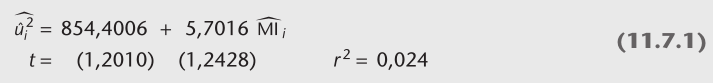

In [123]:
Image('./imagens/cap_11_exemplo_11.9_6.png')

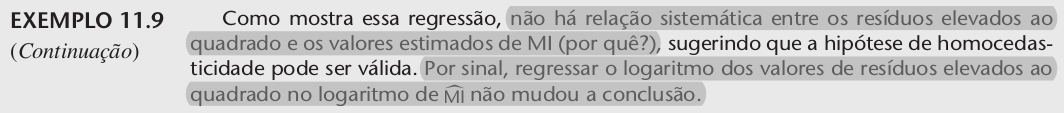

In [124]:
Image('./imagens/cap_11_exemplo_11.9_7.png')

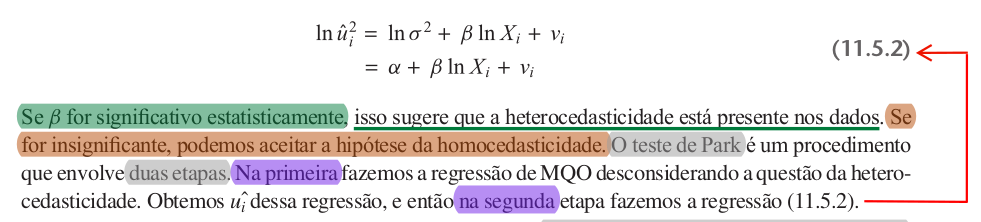

In [125]:
Image('./imagens/cap_11_exemplo_11.1_4.png')

### Teste de Glejser

In [126]:
data['abs'] = np.abs(data['residuos'])
data.head()

observacao   mi  taf  pnbpc    tft  predictions  residuos  residuos_2     abs
0           1  128   37   1870 6.6600     170.5138  -42.5138   1807.4216 42.5138
1           2  204   22    130 6.1500     213.8126   -9.8126     96.2879  9.8126
2           3  202   16    310 7.0000     226.1858  -24.1858    584.9514 24.1858
3           4  197   65    570 6.2500     115.3700   81.6300   6663.4644 81.6300
4           5   96   76   2050 3.8100      82.4656   13.5344    183.1813 13.5344

In [127]:
x = data[['predictions']]
y = data['abs']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    abs   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.593
Date:                Sat, 10 Jun 2023   Prob (F-statistic):              0.212
Time:                        20:33:28   Log-Likelihood:                -298.29
No. Observations:                  64   AIC:                             600.6
Df Residuals:                      62   BIC:                             604.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          22.3128      7.944      2.809      

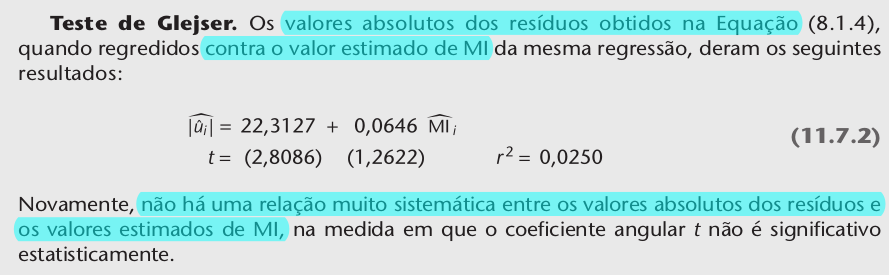

In [128]:
Image('./imagens/cap_11_exemplo_11.9_9.png')

### Teste White

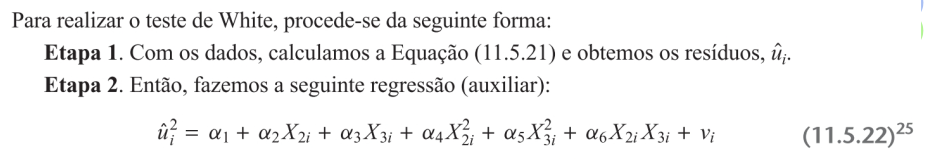

In [129]:
Image('./imagens/cap_11_exemplo_11.9_11.png')

In [130]:
data_white = data[['observacao', 'mi', 'taf', 'pnbpc', 'predictions', 'residuos','residuos_2']].copy()
data_white.head()

observacao   mi  taf  pnbpc  predictions  residuos  residuos_2
0           1  128   37   1870     170.5138  -42.5138   1807.4216
1           2  204   22    130     213.8126   -9.8126     96.2879
2           3  202   16    310     226.1858  -24.1858    584.9514
3           4  197   65    570     115.3700   81.6300   6663.4644
4           5   96   76   2050      82.4656   13.5344    183.1813

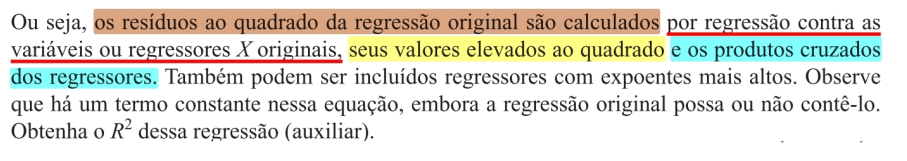

In [131]:
Image('./imagens/cap_11_exemplo_11.9_12.png')

In [132]:
data_white['taf_2']     = np.power(data_white['taf'],2)
data_white['pnbpc_2']   = np.square(data_white['pnbpc'])
data_white['taf_pnbpc'] = data_white.apply(lambda x: x['taf']* x['pnbpc'], axis = 1 )

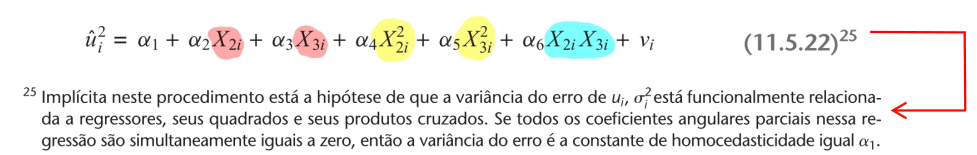

In [133]:
Image('./imagens/cap_11_exemplo_11.9_10.png')

In [134]:
data_white[['residuos_2','taf', 'pnbpc', 'taf_2', 'pnbpc_2', 'taf_pnbpc']].head()

residuos_2  taf  pnbpc  taf_2  pnbpc_2   taf_pnbpc
0   1807.4216   37   1870   1369  3496900  69190.0000
1     96.2879   22    130    484    16900   2860.0000
2    584.9514   16    310    256    96100   4960.0000
3   6663.4644   65    570   4225   324900  37050.0000
4    183.1813   76   2050   5776  4202500 155800.0000

In [135]:
x = data_white[['taf', 'pnbpc', 'taf_2', 'pnbpc_2', 'taf_pnbpc']]
y = data_white['residuos_2']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:             residuos_2   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                 -0.046
Method:                 Least Squares   F-statistic:                    0.4435
Date:                Sat, 10 Jun 2023   Prob (F-statistic):              0.816
Time:                        20:33:28   Log-Likelihood:                -585.54
No. Observations:                  64   AIC:                             1183.
Df Residuals:                      58   BIC:                             1196.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1409.1438   1345.636      1.047      0.2

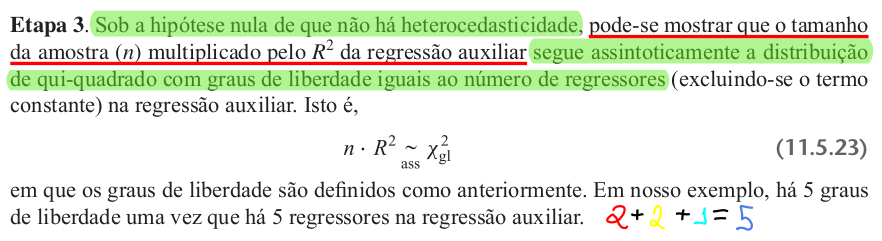

In [136]:
Image('./imagens/cap_11_exemplo_11.9_13.png')

In [137]:
# R Squared
r2 = model.rsquared
r2

0.036823720733384246

In [138]:
# numero de elementos da amostra
n = data_white.shape[0]
n

64

In [139]:
chi2_calculado = n*r2
chi2_calculado

2.3567181269365918

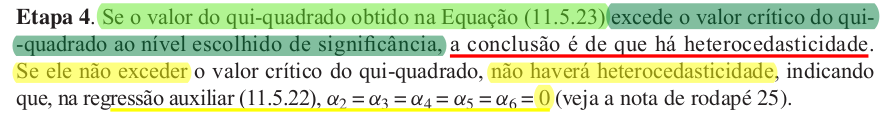

In [140]:
Image('./imagens/cap_11_exemplo_11.9_14.png')

In [141]:
#from scipy.stats import chi2

In [142]:
# chi square critical 5%
chi2_critical = chi2.ppf(0.95,5)
chi2_critical

11.070497693516351

**Teste de white**

chi_calculado **<** chi2_critical 
* --> True --> Homocedastico --> todos os alfas são simultaneamente iguais a zero
* --> False --> Heterocedastico 

In [143]:
chi2_calculado < chi2_critical

True

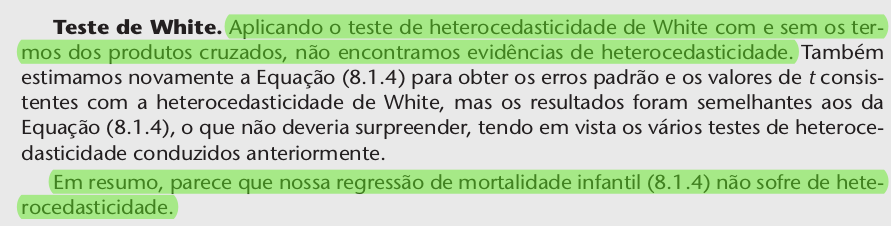

In [144]:
Image('./imagens/cap_11_exemplo_11.9_15.png')

## Exemplo 11.10

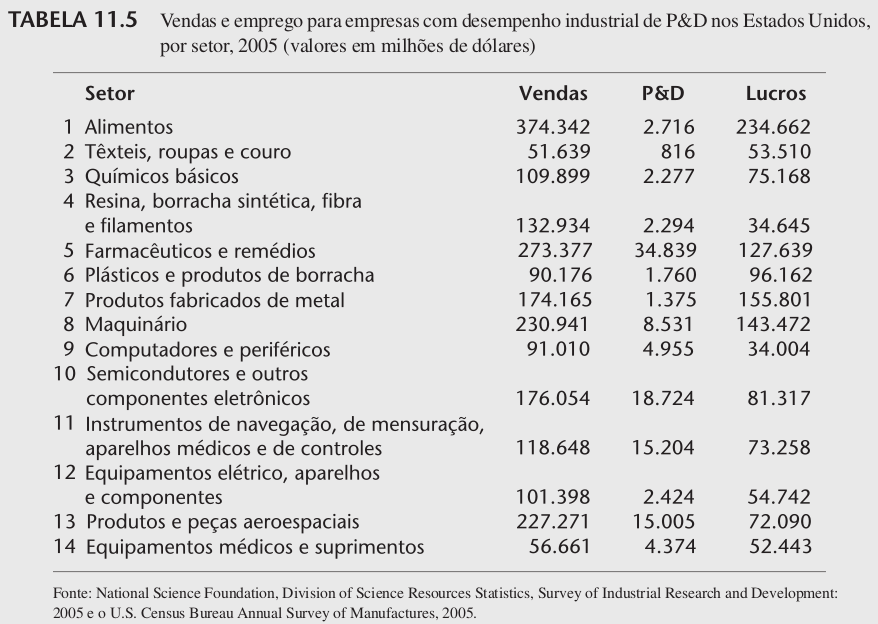

In [145]:
Image('./imagens/cap_11_tabela_11.5.png')

In [146]:
data = pd.read_excel('./datasets/tabela_11.5.xlsx')
data

setor  vendas    p_d   lucro
0        alimentos  374342   2716  234662
1          texteis   51639    816   53510
2         quimicos  109899   2277   75168
3           resina  132934   2294   34645
4    farmaceuticos  273377  34839  127639
5        plasticos   90176   1760   96162
6            metal  174165   1375  155801
7        maqunario  230941   8531  143472
8     computadores   91010   4955   34004
9   semicondutores  176054  18724   81317
10       navegacao  118648  15204   73258
11        eletrico  101398   2424   54742
12    aeroespacial  227271  15005   72090
13          medico   56661   4374   52443

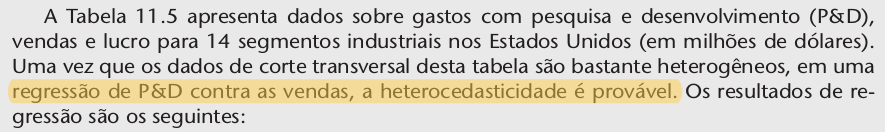

In [147]:
Image('./imagens/cap_11_exemplo_11.10_1.png')

In [148]:
x = data[['vendas']]
y = data['p_d']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    p_d   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     2.484
Date:                Sat, 10 Jun 2023   Prob (F-statistic):              0.141
Time:                        20:33:29   Log-Likelihood:                -146.51
No. Observations:                  14   AIC:                             297.0
Df Residuals:                      12   BIC:                             298.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1337.8739   5015.141      0.267      0.7

/home/deivison/Documentos/projetos/venv_jupyter3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


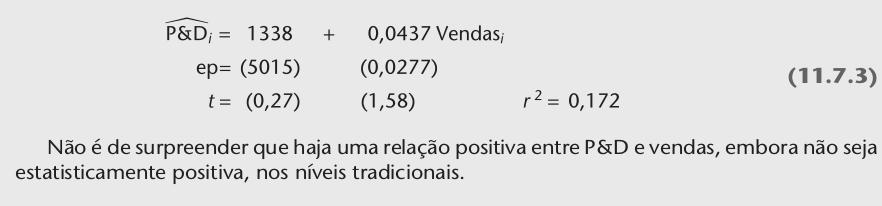

In [149]:
Image('./imagens/cap_11_exemplo_11.10_2.png')

In [150]:
data['predictions'] = predictions
data['residuos'] = model.resid
data['residuos_2'] = model.resid**2
data

setor  vendas    p_d   lucro  predictions    residuos     residuos_2
0        alimentos  374342   2716  234662   17705.3756 -14989.3756 224681379.9797
1          texteis   51639    816   53510    3595.7061  -2779.7061   7726766.1469
2         quimicos  109899   2277   75168    6143.0309  -3866.0309  14946194.8063
3           resina  132934   2294   34645    7150.1992  -4856.1992  23582670.6398
4    farmaceuticos  273377  34839  127639   13290.8434  21548.1566 464323052.9315
5        plasticos   90176   1760   96162    5280.6744  -3520.6744  12395148.5459
6            metal  174165   1375  155801    8952.9583  -7577.9583  57425452.4659
7        maqunario  230941   8531  143472   11435.3976  -2904.3976   8435525.2915
8     computadores   91010   4955   34004    5317.1398   -362.1398    131145.2006
9   semicondutores  176054  18724   81317    9035.5518   9688.4482  93866028.2033
10       navegacao  118648  15204   73258    6525.5668   8678.4332  75315202.2317
11        eletrico  101398   2424   54742    5771.3383  -3347.3383  11204673.9523
12    aeroespacial  227271  15005   72090   11274.9327   3730.0673  13913401.8155
13          medico   56661   4374   52443    3815.2850    558.7150    312162.4562

### Análise gráfica

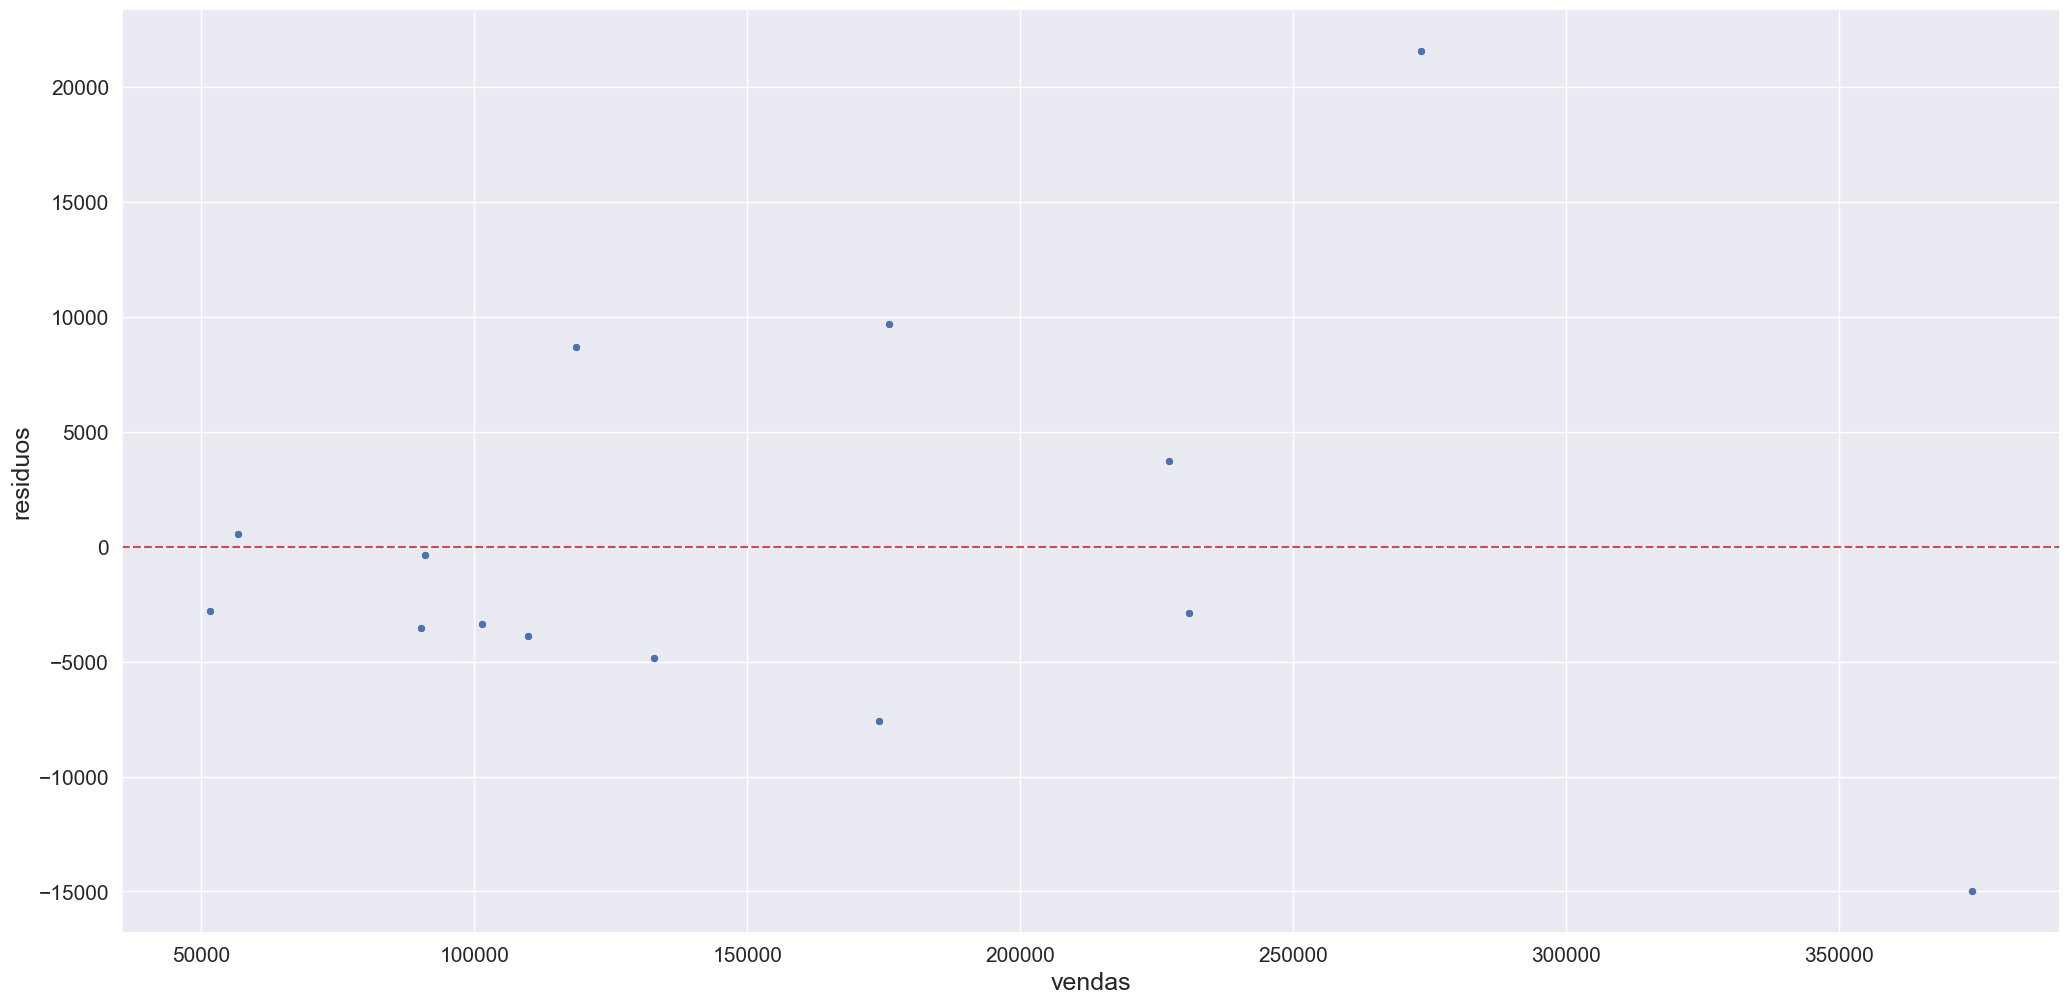

In [151]:
# residuos
sns.scatterplot( data = data, x = 'vendas',y='residuos');
plt.axhline( y = 0, color = 'r', linestyle = '--');

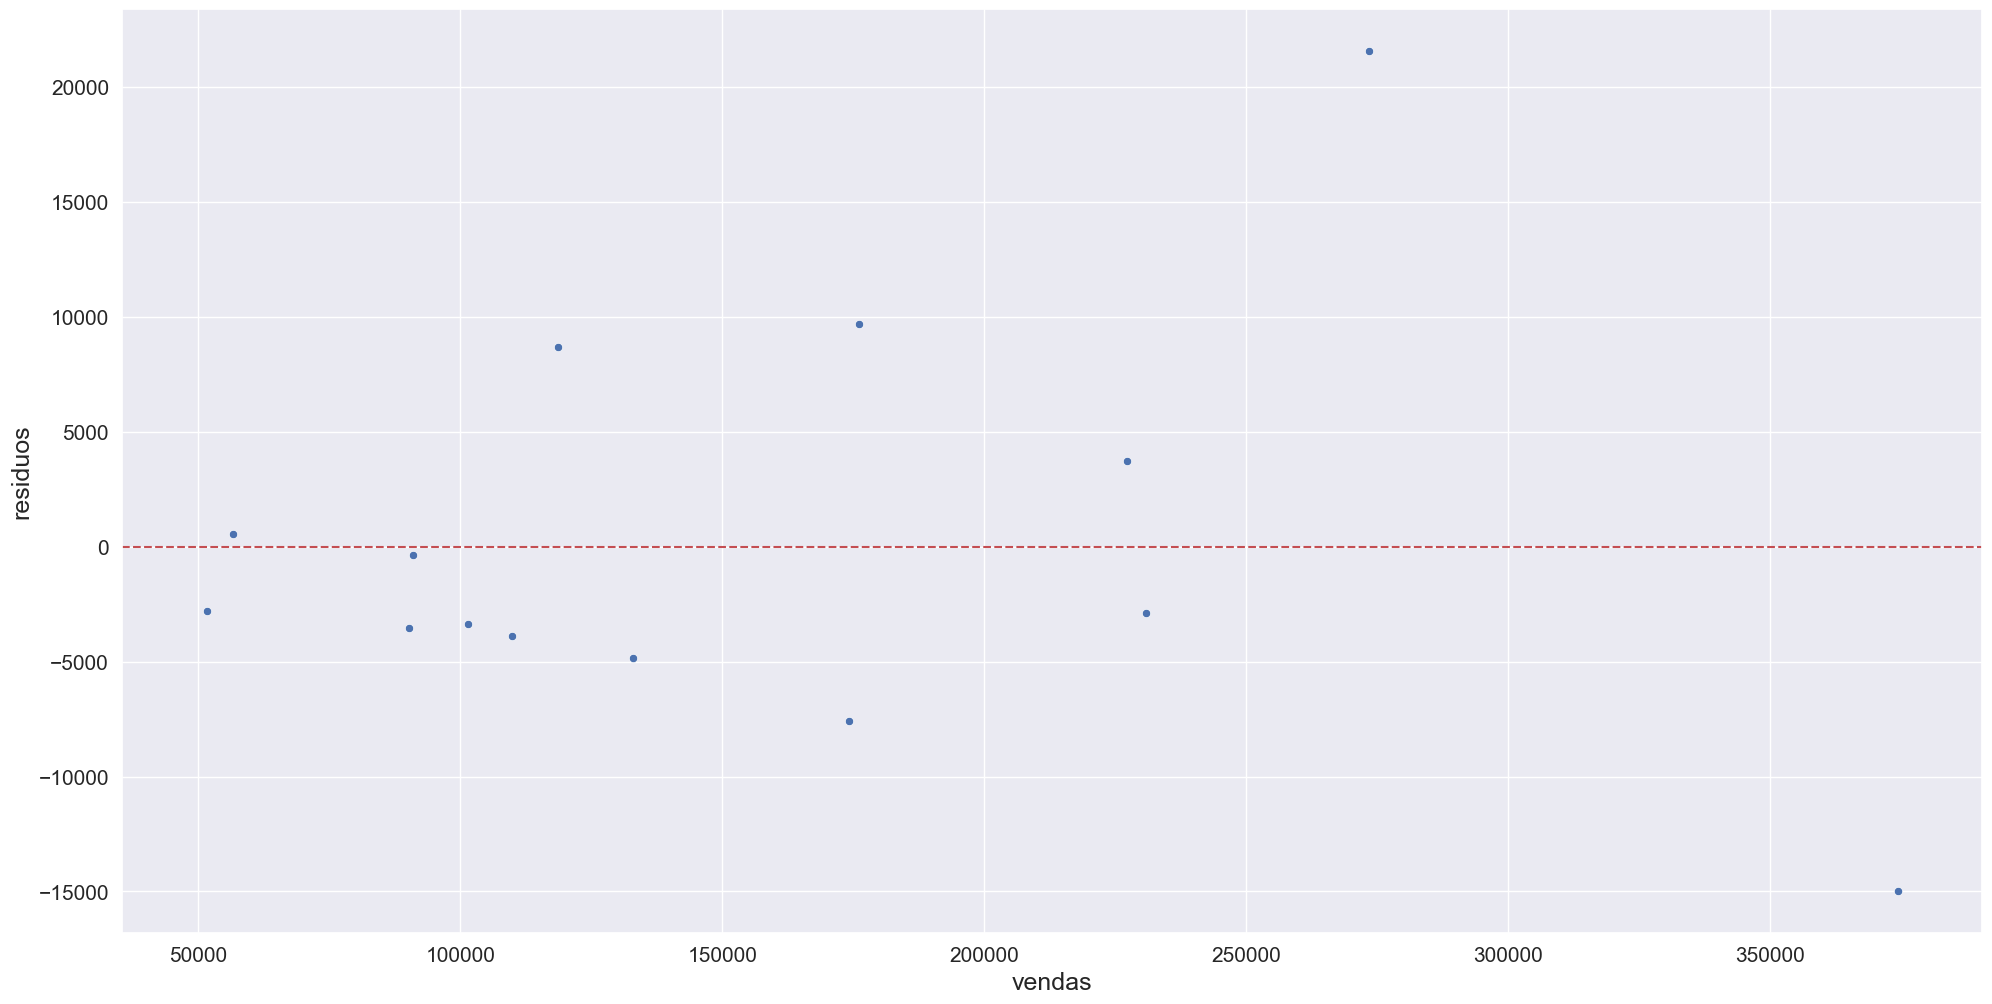

In [152]:
fig = plt.figure( figsize = (24,12) )
specs = gridspec.GridSpec( nrows = 1, ncols = 1, figure = fig)

ax1 = fig.add_subplot( specs[0,0])
#ax2 = fig.add_subplot( specs[1,0])

sns.scatterplot( data = data, x = 'vendas',y='residuos', ax = ax1);
ax1.axhline( y = 0, color = 'r', linestyle = '--');
#sns.regplot(data = data, x = 'vendas',y='residuos', ax = ax1, ci = None, color = 'black');

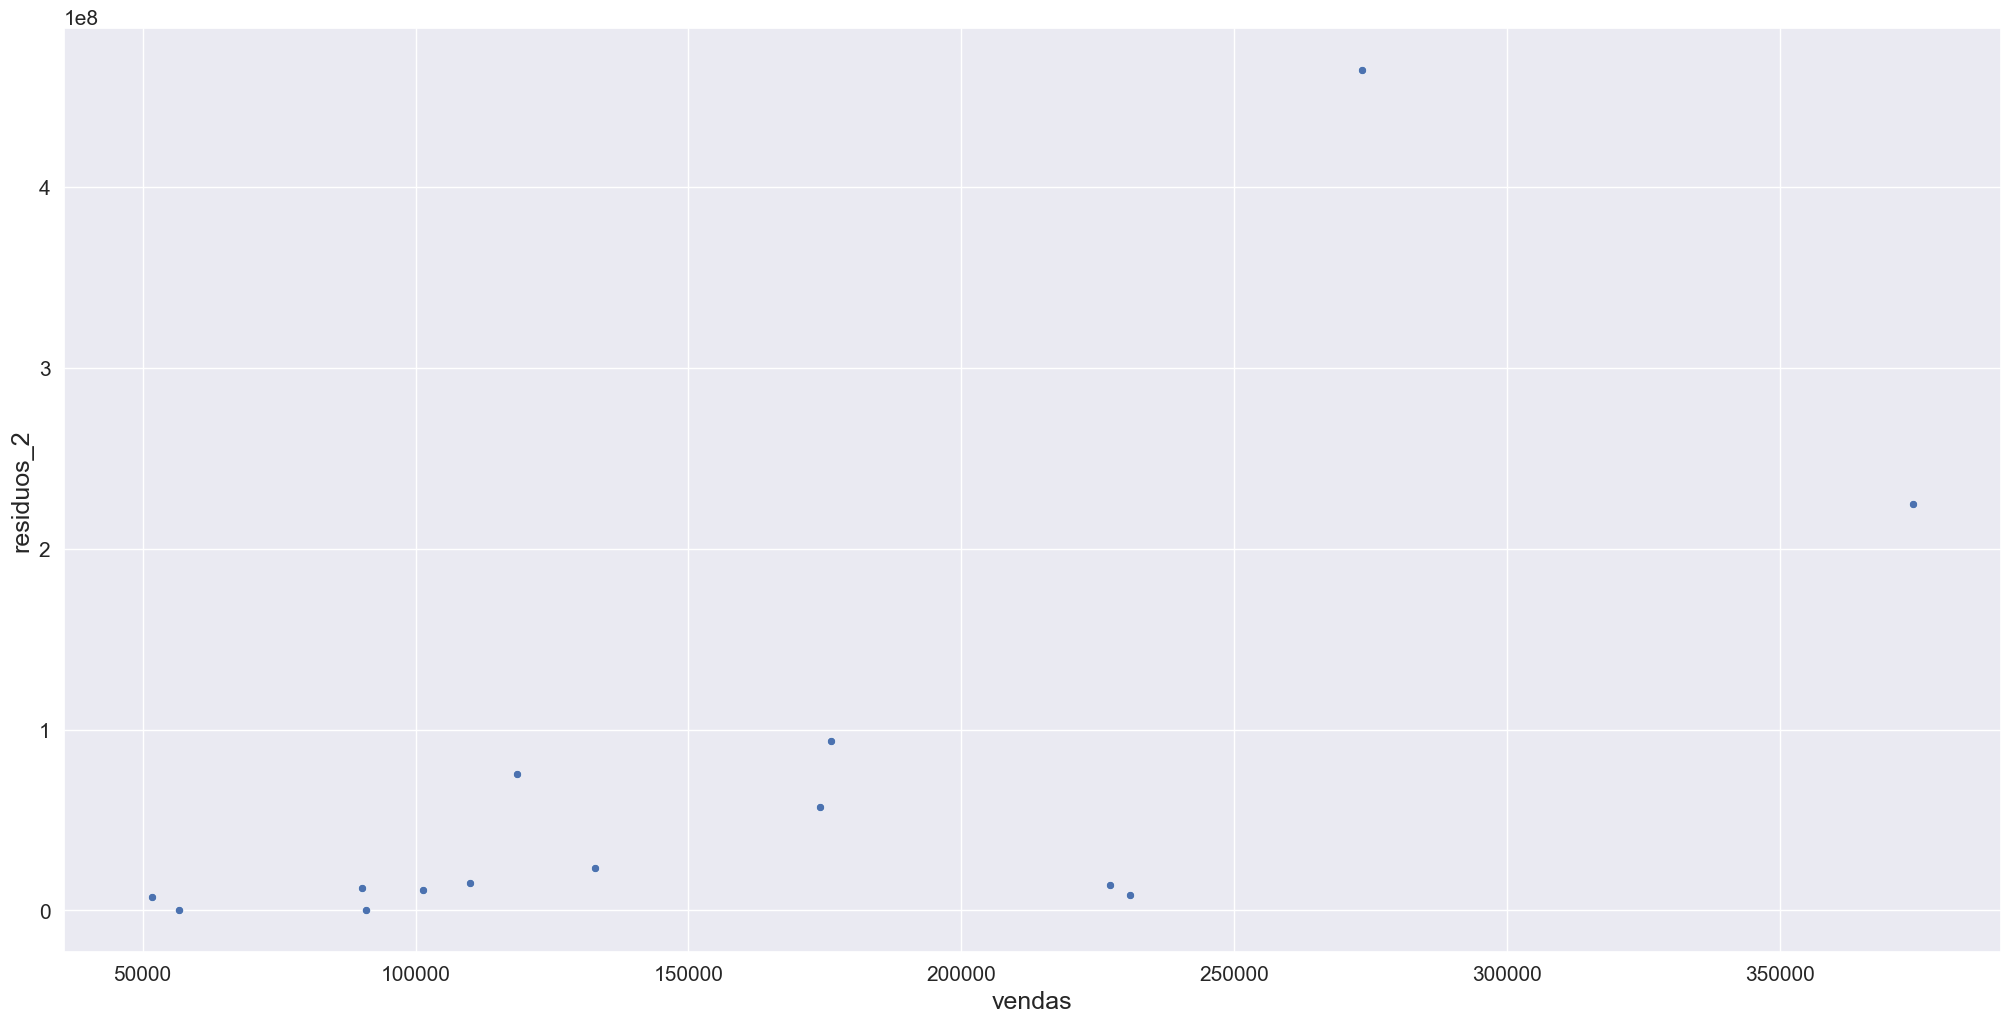

In [153]:
# residuos
sns.scatterplot( data = data, x = 'vendas',y='residuos_2');
#plt.axhline( y = 0, color = 'r', linestyle = '--');

### Teste de park

In [154]:
x = data[['predictions']]
y = data['residuos_2']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predicitons_2 = model.predict(x)
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:             residuos_2   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     9.087
Date:                Sat, 10 Jun 2023   Prob (F-statistic):             0.0108
Time:                        20:33:31   Log-Likelihood:                -276.73
No. Observations:                  14   AIC:                             557.5
Df Residuals:                      12   BIC:                             558.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.005e+08   6.32e+07     -1.590      

/home/deivison/Documentos/projetos/venv_jupyter3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [155]:
x = data[['vendas']]
y = data['residuos_2']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predicitons_2 = model.predict(x)
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:             residuos_2   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     9.087
Date:                Sat, 10 Jun 2023   Prob (F-statistic):             0.0108
Time:                        20:33:31   Log-Likelihood:                -276.73
No. Observations:                  14   AIC:                             557.5
Df Residuals:                      12   BIC:                             558.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.249e+07   5.49e+07     -1.320      0.2

/home/deivison/Documentos/projetos/venv_jupyter3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


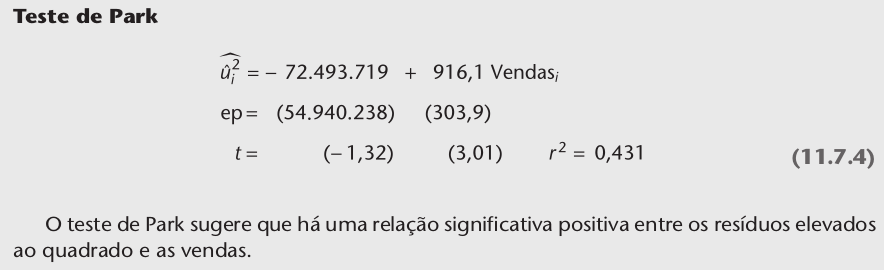

In [156]:
Image('./imagens/cap_11_exemplo_11.10_3.png')

### Teste de Glejser

In [157]:
data['abs'] = np.abs(data['residuos'])
data.head()

setor  vendas    p_d   lucro  predictions    residuos     residuos_2        abs
0      alimentos  374342   2716  234662   17705.3756 -14989.3756 224681379.9797 14989.3756
1        texteis   51639    816   53510    3595.7061  -2779.7061   7726766.1469  2779.7061
2       quimicos  109899   2277   75168    6143.0309  -3866.0309  14946194.8063  3866.0309
3         resina  132934   2294   34645    7150.1992  -4856.1992  23582670.6398  4856.1992
4  farmaceuticos  273377  34839  127639   13290.8434  21548.1566 464323052.9315 21548.1566

In [158]:
x = data[['vendas']]
y = data['abs']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions_2 = model.predict(x)
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    abs   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     13.11
Date:                Sat, 10 Jun 2023   Prob (F-statistic):            0.00351
Time:                        20:33:31   Log-Likelihood:                -135.70
No. Observations:                  14   AIC:                             275.4
Df Residuals:                      12   BIC:                             276.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1002.6008   2316.152     -0.433      0.6

/home/deivison/Documentos/projetos/venv_jupyter3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


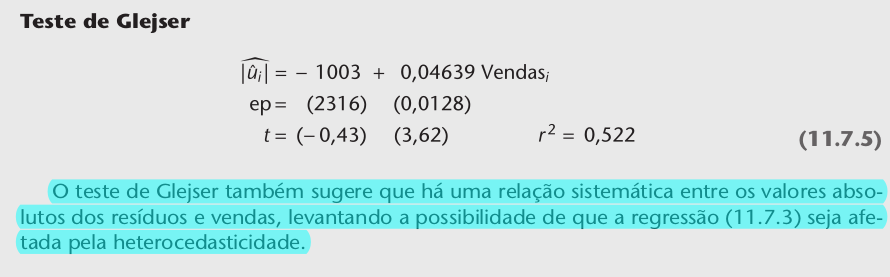

In [159]:
Image('./imagens/cap_11_exemplo_11.10_4.png')

### Teste de white

In [160]:
data_white = data[['residuos_2','vendas']].copy()

data_white['vendas_2'] = np.square(data_white['vendas'])
data_white.head()

residuos_2  vendas      vendas_2
0 224681379.9797  374342  140131932964
1   7726766.1469   51639    2666586321
2  14946194.8063  109899   12077790201
3  23582670.6398  132934   17671448356
4 464323052.9315  273377   74734984129

In [161]:
x = data_white[['vendas','vendas_2']]
y = data_white['residuos_2']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:             residuos_2   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     4.227
Date:                Sat, 10 Jun 2023   Prob (F-statistic):             0.0435
Time:                        20:33:31   Log-Likelihood:                -276.69
No. Observations:                  14   AIC:                             559.4
Df Residuals:                      11   BIC:                             561.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.675e+07   1.12e+08     -0.417      0.6

/home/deivison/Documentos/projetos/venv_jupyter3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


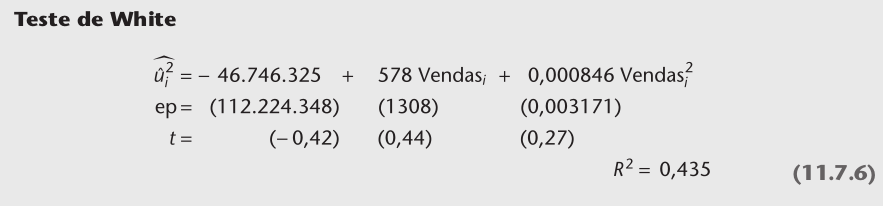

In [162]:
Image('./imagens/cap_11_exemplo_11.10_5.png')

In [163]:
# r Squared
r2 = model.rsquared
r2

0.4345856740296351

In [164]:
# numero de elementos amostra
n = data_white.shape[0]
n

14

In [165]:
chi2_calculado = n * r2
chi2_calculado

6.084199436414892

**Teste White**

chi2_calculado < chi2_critical 
* --> True  --> homocedastico --> todos os alfas são iguais a zero
* --> False --> Heterocedastico

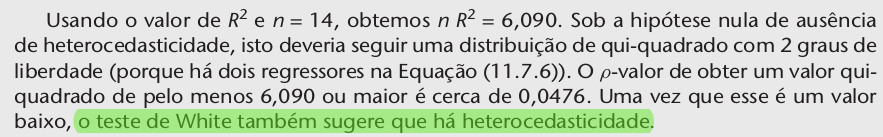

In [166]:
Image('./imagens/cap_11_exemplo_11.10_6.png')

In [167]:
# graus de liberdade --> 2 (vendas, vendas_2)
# chi2 --> 5%
chi2_critical = chi2.ppf(0.95,2)
chi2_critical

5.991464547107979

In [168]:
chi2_calculado < chi2_critical

False

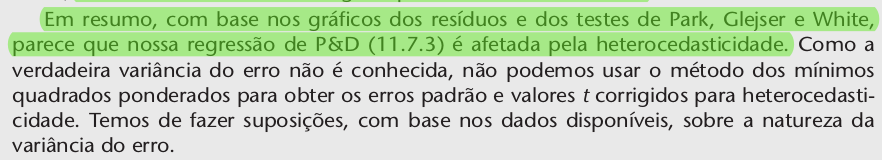

In [169]:
Image('./imagens/cap_11_exemplo_11.10_7.png')